In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import statsmodels.formula.api as smf
import statsmodels.tools.eval_measures as m

In [2]:
owid_df = pd.read_csv("../../../data/stage_2/owid-covid-data.csv")

In [3]:
US_data=owid_df[owid_df['location']=='United States']

In [4]:
US_data[['total_cases','new_cases','new_deaths','total_deaths']]=US_data[['total_cases','new_cases','new_deaths','total_deaths']].fillna(0)

C:\Users\chand\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [5]:
US_data=US_data[US_data['total_cases']>0]

In [6]:
US_data['date']=US_data['date'].astype('datetime64[ns]')

In [7]:
US_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
119842,USA,North America,United States,2020-01-22,1.0,0.0,NaN,0.0,0.0,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
119843,USA,North America,United States,2020-01-23,1.0,0.0,NaN,0.0,0.0,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
119844,USA,North America,United States,2020-01-24,2.0,1.0,NaN,0.0,0.0,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
119845,USA,North America,United States,2020-01-25,2.0,0.0,NaN,0.0,0.0,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
119846,USA,North America,United States,2020-01-26,5.0,3.0,NaN,0.0,0.0,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,-9228.9,-3.71,-3.11,-27.721484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120481,USA,North America,United States,2021-10-22,45400466.0,99422.0,73695.429,735373.0,1820.0,1630.143,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
120482,USA,North America,United States,2021-10-23,45427464.0,26998.0,72961.000,735800.0,427.0,1632.571,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
120483,USA,North America,United States,2021-10-24,45444260.0,16796.0,72843.286,735941.0,141.0,1601.857,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
120484,USA,North America,United States,2021-10-25,45547158.0,102898.0,70892.571,737342.0,1401.0,1554.714,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN


In [8]:
US_data=US_data[['location','date','total_cases','new_cases','total_deaths','new_deaths']]

In [9]:
US_data=US_data[US_data['date']!='2020-01-22']

In [10]:
l=[]
for i in range(0,len(US_data)):
    day=i+1
    l.append(day)

In [11]:
US_data['Number_days_Day1']=l

In [12]:
cases=US_data[['new_cases','Number_days_Day1']]

In [13]:
lm = smf.ols(formula='new_cases~Number_days_Day1', data=cases).fit()

In [14]:
pred=lm.predict(cases.Number_days_Day1)

In [15]:
pred

119843     28366.473320
119844     28499.074967
119845     28631.676613
119846     28764.278260
119847     28896.879906
              ...      
120481    112966.323826
120482    113098.925473
120483    113231.527119
120484    113364.128766
120485    113496.730413
Length: 643, dtype: float64

In [16]:

x_new=pd.DataFrame({'Number_days_Day1':[644,645,646,647,648,649,650]})
x_new


,Number_days_Day1
0,644
1,645
2,646
3,647
4,648
5,649
6,650


In [17]:
lm.params

Intercept           28233.871673
Number_days_Day1      132.601647
dtype: float64

In [18]:
pred_next=lm.predict(x_new.Number_days_Day1)

In [19]:
pred_next

0    113629.332059
1    113761.933706
2    113894.535352
3    114027.136999
4    114159.738645
5    114292.340292
6    114424.941938
dtype: float64

In [20]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              new_cases   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     100.1
Date:                Sun, 21 Nov 2021   Prob (F-statistic):           5.35e-22
Time:                        23:40:48   Log-Likelihood:                -8010.7
No. Observations:                 643   AIC:                         1.603e+04
Df Residuals:                     641   BIC:                         1.603e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.823e+04   4925.523      5.732      0.000    1.86e+04    3.79e+04
Number_days_Day1   132.6016     13.252     10.006      0.000     106.578     158.625
==============================================================================
Omnibus:                      121.264   Durbin-Watson:                   0.386
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.589
Skew:                           1.216   Prob(JB):                     9.17e-43
Kurtosis:                       4.146   Cond. No.                         744.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

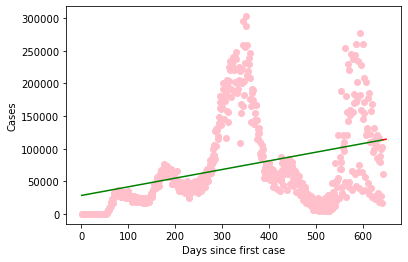

In [21]:
plt.scatter(cases.Number_days_Day1,cases.new_cases,color='pink')
plt.plot(cases.Number_days_Day1,pred,color='green')
plt.plot(x_new.Number_days_Day1,pred_next,color='red')
plt.xlabel('Days since first case')
plt.ylabel('Cases')
plt.show()


In [22]:
lm.rsquared

0.13508893486317175

In [23]:
m.rmse(cases.new_cases,pred)

62279.422883468316

In [24]:
lm.pvalues

Intercept           1.527251e-08
Number_days_Day1    5.347620e-22
dtype: float64

In [25]:
lm.conf_int()

,0,1
Intercept,18561.761935,37905.981412
Number_days_Day1,106.578211,158.625082


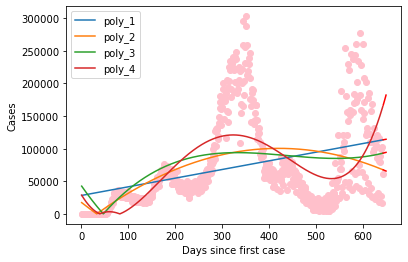

In [26]:
plt.scatter(cases.Number_days_Day1,cases.new_cases,color='pink')
poly1=smf.ols(formula='new_cases ~ 1+Number_days_Day1',data=cases).fit()

plt.plot(cases.Number_days_Day1,poly1.predict(cases.Number_days_Day1).abs(),label='poly_1')
plt.plot(x_new.Number_days_Day1,poly1.predict(x_new.Number_days_Day1),color='red')

poly2=smf.ols(formula='new_cases ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)',data=cases).fit()

plt.plot(cases.Number_days_Day1,poly2.predict(cases.Number_days_Day1).abs(),label='poly_2')
plt.plot(x_new.Number_days_Day1,poly2.predict(x_new.Number_days_Day1),color='red')

poly3=smf.ols(formula='new_cases ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)',data=cases).fit()

plt.plot(cases.Number_days_Day1,poly3.predict(cases.Number_days_Day1).abs(),label='poly_3')
plt.plot(x_new.Number_days_Day1,poly3.predict(x_new.Number_days_Day1),color='red')

poly4=smf.ols(formula='new_cases ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)+I(Number_days_Day1**4.0)',data=cases).fit()

plt.plot(cases.Number_days_Day1,poly4.predict(cases.Number_days_Day1).abs(),label='poly_4')
plt.plot(x_new.Number_days_Day1,poly4.predict(x_new.Number_days_Day1),color='red')

plt.xlabel('Days since first case')
plt.ylabel('Cases')
plt.legend()

In [27]:
poly1.rsquared

0.13508893486317175

In [28]:
poly2.rsquared

0.22907067169737305

In [29]:
poly3.rsquared

0.24975318320033024

In [30]:
poly4.rsquared

0.37981942533440605

In [31]:
print('poly1_pvalues',poly1.pvalues)
print('poly2_pvalues',poly2.pvalues)
print('poly3_pvalues',poly3.pvalues)
print('poly4_pvalues',poly4.pvalues)

poly1_pvalues Intercept           1.527251e-08
Number_days_Day1    5.347620e-22
dtype: float64
poly2_pvalues Intercept                     1.077975e-02
Number_days_Day1              1.063699e-26
I(Number_days_Day1 ** 2.0)    9.751208e-18
dtype: float64
poly3_pvalues Intercept                     2.855967e-06
Number_days_Day1              3.487370e-16
I(Number_days_Day1 ** 2.0)    2.738550e-08
I(Number_days_Day1 ** 3.0)    3.086648e-05
dtype: float64
poly4_pvalues Intercept                     4.577917e-03
Number_days_Day1              7.758109e-08
I(Number_days_Day1 ** 2.0)    1.814954e-19
I(Number_days_Day1 ** 3.0)    1.713929e-25
I(Number_days_Day1 ** 4.0)    3.161310e-28
dtype: float64


In [32]:
print('ploy1_rmse',m.rmse(cases.new_cases,poly1.predict(cases.Number_days_Day1)))
print('ploy2_rmse',m.rmse(cases.new_cases,poly2.predict(cases.Number_days_Day1)))
print('ploy3_rmse',m.rmse(cases.new_cases,poly3.predict(cases.Number_days_Day1)))
print('ploy4_rmse',m.rmse(cases.new_cases,poly4.predict(cases.Number_days_Day1)))



ploy1_rmse 62279.422883468316
ploy2_rmse 58798.48507500464
ploy3_rmse 58004.39930649859
ploy4_rmse 52737.30498497758


In [33]:
poly1.conf_int()

,0,1
Intercept,18561.761935,37905.981412
Number_days_Day1,106.578211,158.625082


In [34]:
poly2.conf_int()

,0,1
Intercept,-31621.119725,-4151.678951
Number_days_Day1,463.130824,660.124023
I(Number_days_Day1 ** 2.0),-0.814292,-0.518086


In [35]:
poly3.conf_int()

,0,1
Intercept,-61735.115856,-25476.626239
Number_days_Day1,795.413069,1282.624000
I(Number_days_Day1 ** 2.0),-3.396616,-1.639336
I(Number_days_Day1 ** 3.0),0.001020,0.002814


In [36]:
poly4.conf_int()

,0,1
Intercept,9291.137342,50676.372731
Number_days_Day1,-1674.996328,-786.015436
I(Number_days_Day1 ** 2.0),10.508080,16.115451
I(Number_days_Day1 ** 3.0),-0.042838,-0.029761
I(Number_days_Day1 ** 4.0),0.000025,0.000035


 Poly2 is best fit for US <br/>
Confidence interval for US Cases

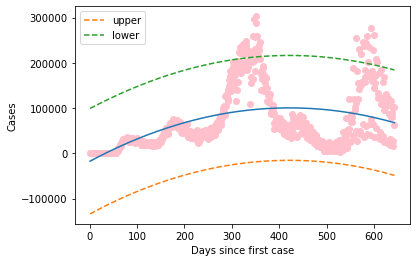

In [37]:
_,upper,lower=wls_prediction_std(poly2)
plt.scatter(cases.Number_days_Day1,cases.new_cases,color='pink')
plt.plot(cases.Number_days_Day1,poly2.predict(cases.Number_days_Day1))
plt.plot(cases.Number_days_Day1,upper,'--',label='upper')
plt.plot(cases.Number_days_Day1,lower,'--',label='lower')
plt.xlabel('Days since first case')
plt.ylabel('Cases')
plt.legend()

Deaths

In [38]:
deaths=US_data[['new_deaths','Number_days_Day1']]

In [39]:
lm_d = smf.ols(formula='new_deaths~Number_days_Day1', data=deaths).fit()

In [40]:
lm_d.params

Intercept           882.988605
Number_days_Day1      0.826460
dtype: float64

In [41]:
pred_deaths=lm_d.predict(deaths.Number_days_Day1)

In [42]:
pred_deaths

119843     883.815065
119844     884.641526
119845     885.467986
119846     886.294447
119847     887.120907
             ...     
120481    1411.096822
120482    1411.923283
120483    1412.749743
120484    1413.576204
120485    1414.402664
Length: 643, dtype: float64

In [43]:
x_new_deaths=pd.DataFrame({'Number_days_Day1':[644,645,646,647,648,649,650]})
x_new_deaths

,Number_days_Day1
0,644
1,645
2,646
3,647
4,648
5,649
6,650


In [44]:
pred_next_deaths=lm_d.predict(x_new_deaths.Number_days_Day1)

In [45]:
pred_next_deaths

0    1415.229125
1    1416.055585
2    1416.882045
3    1417.708506
4    1418.534966
5    1419.361427
6    1420.187887
dtype: float64

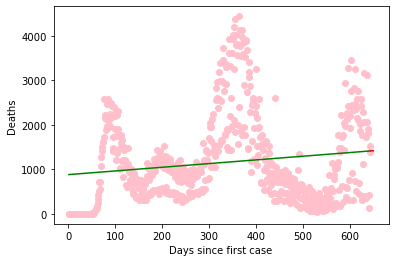

In [46]:
plt.scatter(deaths.Number_days_Day1,deaths.new_deaths,color='pink')
plt.plot(deaths.Number_days_Day1,pred_deaths,color='green')
plt.plot(x_new_deaths.Number_days_Day1,pred_next_deaths,color='red')
plt.xlabel('Days since first case')
plt.ylabel('Deaths')
plt.show()


In [47]:
lm_d.rsquared

0.0249983266336129

In [48]:
m.rmse(deaths.new_deaths,pred_deaths)

958.0520472175737

In [49]:
lm_d.pvalues

Intercept           1.339259e-28
Number_days_Day1    5.654496e-05
dtype: float64

In [50]:
lm_d.conf_int()

,0,1
Intercept,734.201347,1031.775862
Number_days_Day1,0.426139,1.226782


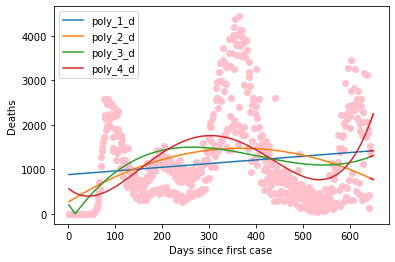

In [51]:
plt.scatter(deaths.Number_days_Day1,deaths.new_deaths,color='pink')
poly1_d=smf.ols(formula='new_deaths ~ 1+Number_days_Day1',data=deaths).fit()

plt.plot(deaths.Number_days_Day1,poly1_d.predict(deaths.Number_days_Day1).abs(),label='poly_1_d')
plt.plot(x_new_deaths.Number_days_Day1,poly1_d.predict(x_new_deaths.Number_days_Day1),color='red')

poly2_d=smf.ols(formula='new_deaths ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)',data=deaths).fit()

plt.plot(deaths.Number_days_Day1,poly2_d.predict(deaths.Number_days_Day1).abs(),label='poly_2_d')
plt.plot(x_new_deaths.Number_days_Day1,poly2_d.predict(x_new_deaths.Number_days_Day1),color='red')

poly3_d=smf.ols(formula='new_deaths ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)',data=deaths).fit()

plt.plot(deaths.Number_days_Day1,poly3_d.predict(deaths.Number_days_Day1).abs(),label='poly_3_d')
plt.plot(x_new_deaths.Number_days_Day1,poly3_d.predict(x_new_deaths.Number_days_Day1),color='red')

poly4_d=smf.ols(formula='new_deaths ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)+I(Number_days_Day1**4.0)',data=deaths).fit()

plt.plot(deaths.Number_days_Day1,poly4_d.predict(deaths.Number_days_Day1).abs(),label='poly_4_d')
plt.plot(x_new_deaths.Number_days_Day1,poly4_d.predict(x_new_deaths.Number_days_Day1),color='red')

plt.xlabel('Days since first case')
plt.ylabel('Deaths')
plt.legend()

In [52]:
poly1_d.rsquared

0.0249983266336129

In [53]:
poly2_d.rsquared

0.10457617548100151

In [54]:
poly3_d.rsquared

0.13955252694974463

In [55]:
poly4_d.rsquared

0.21064392264922815

In [56]:
print('poly1_d_pvalues',poly1_d.pvalues)
print('poly2_d_pvalues',poly2_d.pvalues)
print('poly3_d_pvalues',poly3_d.pvalues)
print('poly4_d_pvalues',poly4_d.pvalues)

poly1_d_pvalues Intercept           1.339259e-28
Number_days_Day1    5.654496e-05
dtype: float64
poly2_d_pvalues Intercept                     1.436080e-02
Number_days_Day1              3.968848e-16
I(Number_days_Day1 ** 2.0)    1.595633e-13
dtype: float64
poly3_d_pvalues Intercept                     1.312193e-01
Number_days_Day1              3.394765e-15
I(Number_days_Day1 ** 2.0)    5.384112e-10
I(Number_days_Day1 ** 3.0)    4.561585e-07
dtype: float64
poly4_d_pvalues Intercept                     9.530207e-04
Number_days_Day1              1.808044e-02
I(Number_days_Day1 ** 2.0)    9.932046e-08
I(Number_days_Day1 ** 3.0)    1.659695e-11
I(Number_days_Day1 ** 4.0)    1.220621e-13
dtype: float64


In [57]:
print('poly1_d_rmse',m.rmse(deaths.new_deaths,poly1_d.predict(deaths.Number_days_Day1)))
print('poly2_d_rmse',m.rmse(deaths.new_deaths,poly2_d.predict(deaths.Number_days_Day1)))
print('poly3_d_rmse',m.rmse(deaths.new_deaths,poly3_d.predict(deaths.Number_days_Day1)))
print('poly4_d_rmse',m.rmse(deaths.new_deaths,poly4_d.predict(deaths.Number_days_Day1)))

poly1_d_rmse 958.0520472175737
poly2_d_rmse 918.1227428264605
poly3_d_rmse 900.0126309477762
poly4_d_rmse 862.0310341099884


In [58]:
poly1_d.conf_int()

,0,1
Intercept,734.201347,1031.775862
Number_days_Day1,0.426139,1.226782


In [59]:
poly2_d.conf_int()

,0,1
Intercept,53.639752,482.567781
Number_days_Day1,5.008321,8.084318
I(Number_days_Day1 ** 2.0),-0.011194,-0.006569


In [60]:
poly3_d.conf_int()

,0,1
Intercept,-497.785584,64.811374
Number_days_Day1,11.761185,19.320888
I(Number_days_Day1 ** 2.0),-0.057405,-0.030139
I(Number_days_Day1 ** 3.0),0.000022,0.000050


In [61]:
poly4_d.conf_int()

,0,1
Intercept,2.335381e+02,9.100110e+02
Number_days_Day1,-1.603470e+01,-1.503639e+00
I(Number_days_Day1 ** 2.0),7.996126e-02,1.716180e-01
I(Number_days_Day1 ** 3.0),-4.801197e-04,-2.663573e-04
I(Number_days_Day1 ** 4.0),2.354901e-07,4.001571e-07


Poly 4 is best fit for deaths<br/>
Confidence interval for deaths

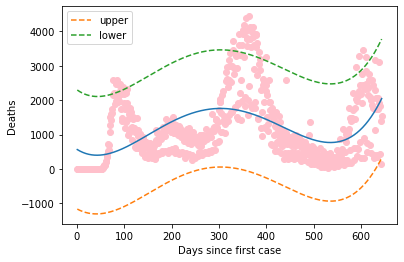

In [62]:
_,upper,lower=wls_prediction_std(poly4_d)
plt.scatter(deaths.Number_days_Day1,deaths.new_deaths,color='pink')
plt.plot(deaths.Number_days_Day1,poly4_d.predict(deaths.Number_days_Day1))
plt.plot(deaths.Number_days_Day1,upper,'--',label='upper')
plt.plot(deaths.Number_days_Day1,lower,'--',label='lower')
plt.xlabel('Days since first case')
plt.ylabel('Deaths')
plt.legend()

Similarly for 5 other countries Brazil,Nigeria,Pakistan,Bangladesh,Indonesia


In [63]:
Brazil_data=owid_df[owid_df['location']=='Brazil']
Brazil_data[['total_cases','new_cases','new_deaths','total_deaths']]=Brazil_data[['total_cases','new_cases','new_deaths','total_deaths']].fillna(0)
Brazil_data=Brazil_data[Brazil_data['total_cases']>0]
Brazil_data['date']=Brazil_data['date'].astype('datetime64[ns]')
Brazil_data=Brazil_data[['location','date','new_cases','new_deaths']]
Brazil_data=Brazil_data[Brazil_data['date']!='2020-02-26']
l=[]
for i in range(0,len(Brazil_data)):
    day=i+1
    l.append(day)
Brazil_data['Number_days_Day1']=l

C:\Users\chand\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [64]:
Brazil_data

,location,date,new_cases,new_deaths,Number_days_Day1
16080,Brazil,2020-02-27,0.0,0.0,1
16081,Brazil,2020-02-28,0.0,0.0,2
16082,Brazil,2020-02-29,1.0,0.0,3
16083,Brazil,2020-03-01,0.0,0.0,4
16084,Brazil,2020-03-02,0.0,0.0,5
...,...,...,...,...,...
16683,Brazil,2021-10-22,14502.0,460.0,604
16684,Brazil,2021-10-23,11716.0,318.0,605
16685,Brazil,2021-10-24,6204.0,187.0,606
16686,Brazil,2021-10-25,5797.0,160.0,607


In [65]:
cases_b=Brazil_data[['new_cases','Number_days_Day1']]
lm_b = smf.ols(formula='new_cases~Number_days_Day1', data=cases_b).fit()
pred_b=lm_b.predict(cases_b.Number_days_Day1)
x_new_b=pd.DataFrame({'Number_days_Day1':[609,610,611,612,613,614,615]})
pred_next_b=lm_b.predict(x_new_b.Number_days_Day1)

In [66]:
pred_next_b

0    50851.671020
1    50902.006660
2    50952.342299
3    51002.677939
4    51053.013579
5    51103.349218
6    51153.684858
dtype: float64

In [67]:
print('lm_b_rsquared',lm_b.rsquared)
print('lm_b_pvalues',lm_b.pvalues)

lm_b_rsquared 0.12312123682707421
lm_b_pvalues Intercept           6.261264e-24
Number_days_Day1    4.689166e-19
dtype: float64


In [68]:
m.rmse(cases_b.new_cases,pred_b)

23577.147034095735

In [69]:
lm_b.conf_int()

,0,1
Intercept,16430.772945,23963.760015
Number_days_Day1,39.618993,61.052286


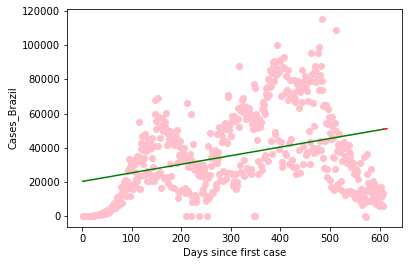

In [70]:
plt.scatter(cases_b.Number_days_Day1,cases_b.new_cases,color='pink')
plt.plot(cases_b.Number_days_Day1,pred_b,color='green')
plt.plot(x_new_b.Number_days_Day1,pred_next_b,color='red')
plt.xlabel('Days since first case')
plt.ylabel('Cases_Brazil')
plt.show()


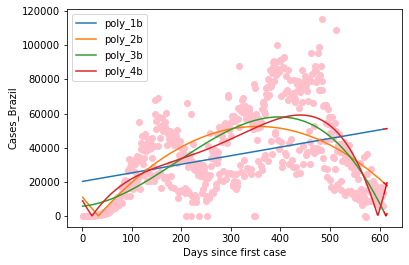

In [71]:
plt.scatter(cases_b.Number_days_Day1,cases_b.new_cases,color='pink')
poly1b=smf.ols(formula='new_cases ~ 1+Number_days_Day1',data=cases_b).fit()

plt.plot(cases_b.Number_days_Day1,poly1b.predict(cases_b.Number_days_Day1).abs(),label='poly_1b')
plt.plot(x_new_b.Number_days_Day1,poly1b.predict(x_new_b.Number_days_Day1),color='red')

poly2b=smf.ols(formula='new_cases ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)',data=cases_b).fit()

plt.plot(cases_b.Number_days_Day1,poly2b.predict(cases_b.Number_days_Day1).abs(),label='poly_2b')
plt.plot(x_new_b.Number_days_Day1,poly2b.predict(x_new_b.Number_days_Day1).abs(),color='red')

poly3b=smf.ols(formula='new_cases ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)',data=cases_b).fit()

plt.plot(cases_b.Number_days_Day1,poly3b.predict(cases_b.Number_days_Day1).abs(),label='poly_3b')
plt.plot(x_new_b.Number_days_Day1,poly3b.predict(x_new_b.Number_days_Day1).abs(),color='red')
poly4b=smf.ols(formula='new_cases ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)+I(Number_days_Day1**4.0)',data=cases_b).fit()

plt.plot(cases_b.Number_days_Day1,poly4b.predict(cases_b.Number_days_Day1).abs(),label='poly_4b')
plt.plot(x_new_b.Number_days_Day1,poly4b.predict(x_new_b.Number_days_Day1).abs(),color='red')

plt.xlabel('Days since first case')
plt.ylabel('Cases_Brazil')
plt.legend()

In [72]:
print('poly1b_rsquared',poly1b.rsquared)
print('poly2b_rsquared',poly2b.rsquared)
print('poly3b_rsquared',poly3b.rsquared)
print('poly4b_rsquared',poly4b.rsquared)
print('poly1b_pvalues',poly1b.pvalues)
print('poly2b_pvalues',poly2b.pvalues)
print('poly3b_pvalues',poly3b.pvalues)
print('poly4b_pvalues',poly4b.pvalues)

poly1b_rsquared 0.12312123682707421
poly2b_rsquared 0.4329988008957618
poly3b_rsquared 0.4968009824785131
poly4b_rsquared 0.5353565442206825
poly1b_pvalues Intercept           6.261264e-24
Number_days_Day1    4.689166e-19
dtype: float64
poly2b_pvalues Intercept                     1.427766e-06
Number_days_Day1              3.727445e-71
I(Number_days_Day1 ** 2.0)    2.853624e-59
dtype: float64
poly3b_pvalues Intercept                     5.198312e-02
Number_days_Day1              5.215553e-01
I(Number_days_Day1 ** 2.0)    8.623679e-08
I(Number_days_Day1 ** 3.0)    2.104700e-17
dtype: float64
poly4b_pvalues Intercept                     8.060286e-03
Number_days_Day1              2.104187e-10
I(Number_days_Day1 ** 2.0)    3.137824e-07
I(Number_days_Day1 ** 3.0)    6.691570e-09
I(Number_days_Day1 ** 4.0)    4.200018e-12
dtype: float64


In [73]:
print('ploy1b_rmse',m.rmse(cases_b.new_cases,poly1b.predict(cases_b.Number_days_Day1)))
print('ploy2b_rmse',m.rmse(cases_b.new_cases,poly2b.predict(cases_b.Number_days_Day1)))
print('ploy3b_rmse',m.rmse(cases_b.new_cases,poly3b.predict(cases_b.Number_days_Day1)))
print('ploy4b_rmse',m.rmse(cases_b.new_cases,poly4b.predict(cases_b.Number_days_Day1)))

ploy1b_rmse 23577.147034095735
ploy2b_rmse 18958.914345566427
ploy3b_rmse 17860.407689011052
ploy4b_rmse 17162.533113696933


In [74]:
poly1b.conf_int()

,0,1
Intercept,16430.772945,23963.760015
Number_days_Day1,39.618993,61.052286


In [75]:
poly2b.conf_int()

,0,1
Intercept,-15854.162457,-6741.716231
Number_days_Day1,325.572600,394.676499
I(Number_days_Day1 ** 2.0),-0.563624,-0.453745


In [76]:
poly3b.conf_int()

,0,1
Intercept,-49.070428,11439.506860
Number_days_Day1,-54.965966,108.272584
I(Number_days_Day1 ** 2.0),0.547824,1.170417
I(Number_days_Day1 ** 3.0),-0.001833,-0.001161


In [77]:
poly4b.conf_int()

,0,1
Intercept,-16313.553943,-2450.999800
Number_days_Day1,360.745034,675.605038
I(Number_days_Day1 ** 2.0),-3.815868,-1.715839
I(Number_days_Day1 ** 3.0),0.005167,0.010346
I(Number_days_Day1 ** 4.0),-0.000010,-0.000005


For Brazil Poly2b is best fit bases on r^2 value<br/>
Confidence interval

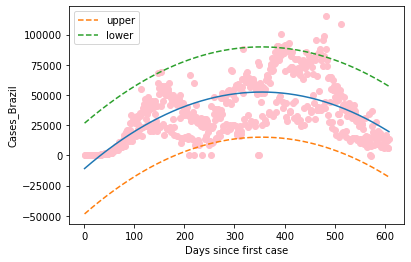

In [78]:
_,upper,lower=wls_prediction_std(poly2b)
plt.scatter(cases_b.Number_days_Day1,cases_b.new_cases,color='pink')
plt.plot(cases_b.Number_days_Day1,poly2b.predict(cases_b.Number_days_Day1))
plt.plot(cases_b.Number_days_Day1,upper,'--',label='upper')
plt.plot(cases_b.Number_days_Day1,lower,'--',label='lower')
plt.xlabel('Days since first case')
plt.ylabel('Cases_Brazil')
plt.legend()

Deaths Brazil

In [79]:
deaths_b=Brazil_data[['new_deaths','Number_days_Day1']]
lm_d_b = smf.ols(formula='new_deaths~Number_days_Day1', data=deaths_b).fit()
pred_deaths_b=lm_d_b.predict(deaths_b.Number_days_Day1)
x_new_deaths_b=pd.DataFrame({'Number_days_Day1':[609,610,611,612,613,614,615]})
pred_next_deaths_b=lm_d_b.predict(x_new_deaths_b.Number_days_Day1)

In [80]:
pred_next_deaths_b

0    1461.977917
1    1463.504560
2    1465.031203
3    1466.557846
4    1468.084489
5    1469.611131
6    1471.137774
dtype: float64

In [81]:
print('lm_b_rsquared',lm_d_b.rsquared)
print('lm_b_pvalues',lm_d_b.pvalues)

lm_b_rsquared 0.1107254265615416
lm_b_pvalues Intercept           5.981249e-17
Number_days_Day1    3.473056e-17
dtype: float64


In [82]:
m.rmse(deaths_b.new_deaths,pred_deaths_b)

759.3536907102388

In [83]:
lm_d_b.conf_int()

,0,1
Intercept,410.944168,653.560525
Number_days_Day1,1.181490,1.871796


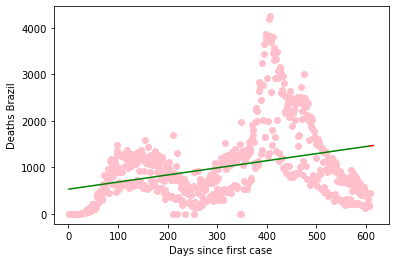

In [84]:
plt.scatter(deaths_b.Number_days_Day1,deaths_b.new_deaths,color='pink')
plt.plot(deaths_b.Number_days_Day1,pred_deaths_b,color='green')
plt.plot(x_new_deaths_b.Number_days_Day1,pred_next_deaths_b,color='red')
plt.xlabel('Days since first case')
plt.ylabel('Deaths Brazil')
plt.show()

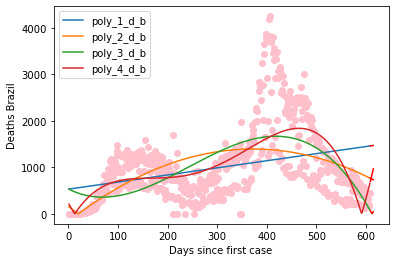

In [85]:
plt.scatter(deaths_b.Number_days_Day1,deaths_b.new_deaths,color='pink')
poly1_d_b=smf.ols(formula='new_deaths ~ 1+Number_days_Day1',data=deaths_b).fit()

plt.plot(deaths_b.Number_days_Day1,poly1_d_b.predict(deaths_b.Number_days_Day1).abs(),label='poly_1_d_b')
plt.plot(x_new_deaths_b.Number_days_Day1,poly1_d_b.predict(x_new_deaths_b.Number_days_Day1).abs(),color='red')

poly2_d_b=smf.ols(formula='new_deaths ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)',data=deaths_b).fit()

plt.plot(deaths_b.Number_days_Day1,poly2_d_b.predict(deaths_b.Number_days_Day1).abs(),label='poly_2_d_b')
plt.plot(x_new_deaths_b.Number_days_Day1,poly2_d_b.predict(x_new_deaths_b.Number_days_Day1).abs(),color='red')

poly3_d_b=smf.ols(formula='new_deaths ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)',data=deaths_b).fit()

plt.plot(deaths_b.Number_days_Day1,poly3_d_b.predict(deaths_b.Number_days_Day1).abs(),label='poly_3_d_b')
plt.plot(x_new_deaths_b.Number_days_Day1,poly3_d_b.predict(x_new_deaths_b.Number_days_Day1).abs(),color='red')

poly4_d_b=smf.ols(formula='new_deaths ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)+I(Number_days_Day1**4.0)',data=deaths_b).fit()

plt.plot(deaths_b.Number_days_Day1,poly4_d_b.predict(deaths_b.Number_days_Day1).abs(),label='poly_4_d_b')
plt.plot(x_new_deaths_b.Number_days_Day1,poly4_d_b.predict(x_new_deaths_b.Number_days_Day1).abs(),color='red')

plt.xlabel('Days since first case')
plt.ylabel('Deaths Brazil')
plt.legend()

In [86]:
print('poly1_d_b_rsquared',poly1_d_b.rsquared)
print('poly2_d_b_rsquared',poly2_d_b.rsquared)
print('poly3_d_b_rsquared',poly3_d_b.rsquared)
print('poly4_d_b_rsquared',poly4_d_b.rsquared)
print('poly1_d_b_pvalues',poly1_d_b.pvalues)
print('poly2_d_b_pvalues',poly2_d_b.pvalues)
print('poly3_d_b_pvalues',poly3_d_b.pvalues)
print('poly4_d_b_pvalues',poly4_d_b.pvalues)


poly1_d_b_rsquared 0.1107254265615416
poly2_d_b_rsquared 0.25848716026333374
poly3_d_b_rsquared 0.36384686701126356
poly4_d_b_rsquared 0.46036737326607835
poly1_d_b_pvalues Intercept           5.981249e-17
Number_days_Day1    3.473056e-17
dtype: float64
poly2_d_b_pvalues Intercept                     5.474315e-02
Number_days_Day1              2.844227e-34
I(Number_days_Day1 ** 2.0)    1.058395e-25
dtype: float64
poly3_d_b_pvalues Intercept                     4.854865e-07
Number_days_Day1              3.838138e-04
I(Number_days_Day1 ** 2.0)    1.410158e-14
I(Number_days_Day1 ** 3.0)    6.768987e-22
dtype: float64
poly4_d_b_pvalues Intercept                     6.150854e-02
Number_days_Day1              4.284281e-12
I(Number_days_Day1 ** 2.0)    2.091255e-13
I(Number_days_Day1 ** 3.0)    4.363364e-18
I(Number_days_Day1 ** 4.0)    2.349151e-23
dtype: float64


In [87]:
print('poly1_d_b_rmse',m.rmse(deaths_b.new_deaths,poly1_d_b.predict(deaths_b.Number_days_Day1)))
print('poly2_d_b_rmse',m.rmse(deaths_b.new_deaths,poly2_d_b.predict(deaths_b.Number_days_Day1)))
print('poly3_d_b_rmse',m.rmse(deaths_b.new_deaths,poly3_d_b.predict(deaths_b.Number_days_Day1)))
print('poly4_d_b_rmse',m.rmse(deaths_b.new_deaths,poly4_d_b.predict(deaths_b.Number_days_Day1)))

poly1_d_b_rmse 759.3536907102388
poly2_d_b_rmse 693.4026680423472
poly3_d_b_rmse 642.2542781112753
poly4_d_b_rmse 591.527950524282


In [88]:
poly1_d_b.conf_int()

,0,1
Intercept,410.944168,653.560525
Number_days_Day1,1.181490,1.871796


In [89]:
poly2_d_b.conf_int()

,0,1
Intercept,-329.947549,3.330739
Number_days_Day1,7.104522,9.631926
I(Number_days_Day1 ** 2.0),-0.013243,-0.009225


In [90]:
poly3_d_b.conf_int()

,0,1
Intercept,328.519348,741.644739
Number_days_Day1,-8.271890,-2.401886
I(Number_days_Day1 ** 2.0),0.033786,0.056175
I(Number_days_Day1 ** 3.0),-0.000074,-0.000049


In [91]:
poly4_d_b.conf_int()

,0,1
Intercept,-4.667702e+02,1.101985e+01
Number_days_Day1,1.410926e+01,2.496130e+01
I(Number_days_Day1 ** 2.0),-1.746420e-01,-1.022619e-01
I(Number_days_Day1 ** 3.0),3.174912e-04,4.959943e-04
I(Number_days_Day1 ** 4.0),-4.571708e-07,-3.117623e-07


poly3_d_b is the best fit for the brazil deaths<br/>
Confidence interval for Brazil deaths

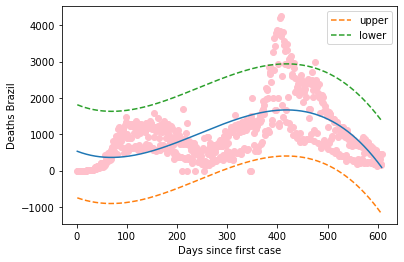

In [92]:
_,upper,lower=wls_prediction_std(poly3_d_b)
plt.scatter(deaths_b.Number_days_Day1,deaths_b.new_deaths,color='pink')
plt.plot(deaths_b.Number_days_Day1,poly3_d_b.predict(deaths_b.Number_days_Day1))
plt.plot(deaths_b.Number_days_Day1,upper,'--',label='upper')
plt.plot(deaths_b.Number_days_Day1,lower,'--',label='lower')
plt.xlabel('Days since first case')
plt.ylabel('Deaths Brazil')
plt.legend()

Nigeria

In [93]:
Nigeria_data=owid_df[owid_df['location']=='Nigeria']
Nigeria_data[['total_cases','new_cases','new_deaths','total_deaths']]=Nigeria_data[['total_cases','new_cases','new_deaths','total_deaths']].fillna(0)
Nigeria_data=Nigeria_data[Nigeria_data['total_cases']>0]
Nigeria_data['date']=Nigeria_data['date'].astype('datetime64[ns]')
Nigeria_data=Nigeria_data[['location','date','new_cases','new_deaths']]
Nigeria_data=Nigeria_data[Nigeria_data['date']!='2020-02-28']
l=[]
for i in range(0,len(Nigeria_data)):
    day=i+1
    l.append(day)
Nigeria_data['Number_days_Day1']=l


C:\Users\chand\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [94]:
Nigeria_data

,location,date,new_cases,new_deaths,Number_days_Day1
82789,Nigeria,2020-02-29,0.0,0.0,1
82790,Nigeria,2020-03-01,0.0,0.0,2
82791,Nigeria,2020-03-02,0.0,0.0,3
82792,Nigeria,2020-03-03,0.0,0.0,4
82793,Nigeria,2020-03-04,0.0,0.0,5
...,...,...,...,...,...
83390,Nigeria,2021-10-22,176.0,5.0,602
83391,Nigeria,2021-10-23,159.0,1.0,603
83392,Nigeria,2021-10-24,165.0,26.0,604
83393,Nigeria,2021-10-25,711.0,2.0,605


In [95]:
cases_n=Nigeria_data[['new_cases','Number_days_Day1']]
lm_n = smf.ols(formula='new_cases~Number_days_Day1', data=cases_n).fit()
pred_n=lm_n.predict(cases_n.Number_days_Day1)
x_new_n=pd.DataFrame({'Number_days_Day1':[607,608,609,610,611,612,613]})
pred_next_n=lm_n.predict(x_new_n.Number_days_Day1)

In [96]:
pred_next_n

0    398.181769
1    398.344715
2    398.507661
3    398.670606
4    398.833552
5    398.996498
6    399.159444
dtype: float64

In [97]:
print('lm_n_rsquared',lm_n.rsquared)
print('lm_n_pvalues',lm_n.pvalues)

lm_n_rsquared 0.005473407777482842
lm_n_pvalues Intercept           2.952424e-20
Number_days_Day1    6.876415e-02
dtype: float64


In [98]:
m.rmse(cases_n.new_cases,pred_n)

384.2411232268679

In [99]:
lm_n.conf_int()

,0,1
Intercept,237.788233,360.759120
Number_days_Day1,-0.012573,0.338464


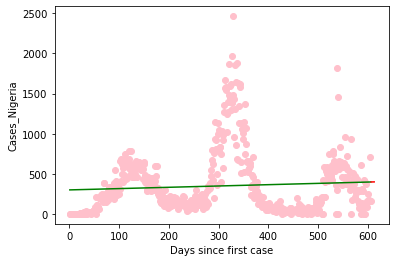

In [100]:
plt.scatter(cases_n.Number_days_Day1,cases_n.new_cases,color='pink')
plt.plot(cases_n.Number_days_Day1,pred_n,color='green')
plt.plot(x_new_n.Number_days_Day1,pred_next_n,color='red')
plt.xlabel('Days since first case')
plt.ylabel('Cases_Nigeria')
plt.show()


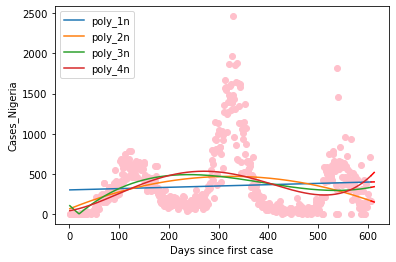

In [101]:
plt.scatter(cases_n.Number_days_Day1,cases_n.new_cases,color='pink')
poly1n=smf.ols(formula='new_cases ~ 1+Number_days_Day1',data=cases_n).fit()

plt.plot(cases_n.Number_days_Day1,poly1n.predict(cases_n.Number_days_Day1),label='poly_1n')
plt.plot(x_new_n.Number_days_Day1,poly1n.predict(x_new_n.Number_days_Day1),color='red')

poly2n=smf.ols(formula='new_cases ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)',data=cases_n).fit()

plt.plot(cases_n.Number_days_Day1,poly2n.predict(cases_n.Number_days_Day1),label='poly_2n')
plt.plot(x_new_n.Number_days_Day1,poly2n.predict(x_new_n.Number_days_Day1),color='red')

poly3n=smf.ols(formula='new_cases ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)',data=cases_n).fit()

plt.plot(cases_n.Number_days_Day1,poly3n.predict(cases_n.Number_days_Day1).abs(),label='poly_3n')
plt.plot(x_new_n.Number_days_Day1,poly3n.predict(x_new_n.Number_days_Day1),color='red')

poly4n=smf.ols(formula='new_cases ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)+I(Number_days_Day1**4.0)',data=cases_n).fit()

plt.plot(cases_n.Number_days_Day1,poly4n.predict(cases_n.Number_days_Day1),label='poly_4n')
plt.plot(x_new_n.Number_days_Day1,poly4n.predict(x_new_n.Number_days_Day1),color='red')

plt.xlabel('Days since first case')
plt.ylabel('Cases_Nigeria')
plt.legend()

In [102]:
print('poly1n_rsquared',poly1n.rsquared)
print('poly2n_rsquared',poly2n.rsquared)
print('poly3n_rsquared',poly3n.rsquared)
print('poly4n_rsquared',poly4n.rsquared)
print('poly1n_pvalues',poly1n.pvalues)
print('poly2n_pvalues',poly2n.pvalues)
print('poly3n_pvalues',poly3n.pvalues)
print('poly4n_pvalues',poly4n.pvalues)

poly1n_rsquared 0.005473407777482842
poly2n_rsquared 0.08028223345352059
poly3n_rsquared 0.10769450102088829
poly4n_rsquared 0.12342113131557053
poly1n_pvalues Intercept           2.952424e-20
Number_days_Day1    6.876415e-02
dtype: float64
poly2n_pvalues Intercept                     1.683901e-01
Number_days_Day1              1.243918e-12
I(Number_days_Day1 ** 2.0)    6.691530e-12
dtype: float64
poly3n_pvalues Intercept                     7.096911e-02
Number_days_Day1              1.502040e-11
I(Number_days_Day1 ** 2.0)    8.513642e-08
I(Number_days_Day1 ** 3.0)    1.988367e-05
dtype: float64
poly4n_pvalues Intercept                     0.596439
Number_days_Day1              0.540852
I(Number_days_Day1 ** 2.0)    0.112640
I(Number_days_Day1 ** 3.0)    0.006778
I(Number_days_Day1 ** 4.0)    0.001084
dtype: float64


In [103]:
print('ploy1n_rmse',m.rmse(cases_n.new_cases,poly1n.predict(cases_n.Number_days_Day1)))
print('ploy2n_rmse',m.rmse(cases_n.new_cases,poly2n.predict(cases_n.Number_days_Day1)))
print('ploy3n_rmse',m.rmse(cases_n.new_cases,poly3n.predict(cases_n.Number_days_Day1)))
print('ploy4n_rmse',m.rmse(cases_n.new_cases,poly4n.predict(cases_n.Number_days_Day1)))

ploy1n_rmse 384.2411232268679
ploy2n_rmse 369.5072220725487
ploy3n_rmse 363.95897046372784
ploy4n_rmse 360.7373758388772


In [104]:
poly1n.conf_int()

,0,1
Intercept,237.788233,360.759120
Number_days_Day1,-0.012573,0.338464


In [105]:
poly2n.conf_int()

,0,1
Intercept,-26.489148,151.408862
Number_days_Day1,1.823160,3.176688
I(Number_days_Day1 ** 2.0),-0.004930,-0.002770


In [106]:
poly3n.conf_int()

,0,1
Intercept,-225.252479,9.256409
Number_days_Day1,4.184415,7.527468
I(Number_days_Day1 ** 2.0),-0.024057,-0.011265
I(Number_days_Day1 ** 3.0),0.000008,0.000022


In [107]:
poly4n.conf_int()

,0,1
Intercept,-1.065664e+02,1.853051e+02
Number_days_Day1,-2.289440e+00,4.361636e+00
I(Number_days_Day1 ** 2.0),-4.250959e-03,4.025586e-02
I(Number_days_Day1 ** 3.0),-1.312373e-04,-2.111351e-05
I(Number_days_Day1 ** 4.0),3.024075e-08,1.202431e-07


For nigeria Poly2n is best fit.We have significant diiference from poly1n to poly2n<br/>
Confidence interval for nigeria cases

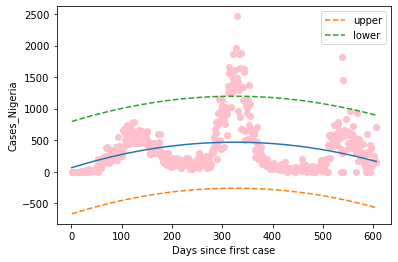

In [108]:
_,upper,lower=wls_prediction_std(poly2n)
plt.scatter(cases_n.Number_days_Day1,cases_n.new_cases,color='pink')
plt.plot(cases_n.Number_days_Day1,poly2n.predict(cases_n.Number_days_Day1))
plt.plot(cases_n.Number_days_Day1,upper,'--',label='upper')
plt.plot(cases_n.Number_days_Day1,lower,'--',label='lower')
plt.xlabel('Days since first case')
plt.ylabel('Cases_Nigeria')
plt.legend()

Deaths

In [109]:
deaths_n=Nigeria_data[['new_deaths','Number_days_Day1']]
lm_d_n = smf.ols(formula='new_deaths~Number_days_Day1', data=deaths_n).fit()
pred_deaths_n=lm_d_n.predict(deaths_n.Number_days_Day1)
x_new_deaths_n=pd.DataFrame({'Number_days_Day1':[607,608,609,610,611,612,613]})
pred_next_deaths_n=lm_d_n.predict(x_new_deaths_n.Number_days_Day1)

In [110]:
pred_next_deaths_n

0    5.261817
1    5.263474
2    5.265130
3    5.266787
4    5.268443
5    5.270099
6    5.271756
dtype: float64

In [111]:
print('lm_d_n_rsquared',lm_d_n.rsquared)
print('lm_d_n_pvalues',lm_d_n.pvalues)

lm_d_n_rsquared 0.0016327301603730193
lm_d_n_pvalues Intercept           9.750053e-13
Number_days_Day1    3.206831e-01
dtype: float64


In [112]:
m.rmse(deaths_n.new_deaths,pred_deaths_n)

7.1656425011379

In [113]:
lm_d_n.conf_int()

,0,1
Intercept,3.109704,5.402966
Number_days_Day1,-0.001617,0.004930


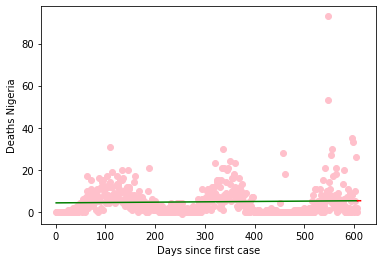

In [114]:
plt.scatter(deaths_n.Number_days_Day1,deaths_n.new_deaths,color='pink')
plt.plot(deaths_n.Number_days_Day1,pred_deaths_n,color='green')
plt.plot(x_new_deaths_n.Number_days_Day1,pred_next_deaths_n,color='red')
plt.xlabel('Days since first case')
plt.ylabel('Deaths Nigeria')
plt.show()

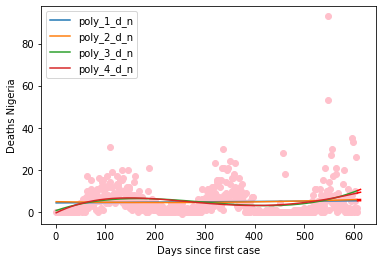

In [115]:
plt.scatter(deaths_n.Number_days_Day1,deaths_n.new_deaths,color='pink')
poly1_d_n=smf.ols(formula='new_deaths ~ 1+Number_days_Day1',data=deaths_n).fit()

plt.plot(deaths_n.Number_days_Day1,poly1_d_n.predict(deaths_n.Number_days_Day1),label='poly_1_d_n')
plt.plot(x_new_deaths_n.Number_days_Day1,poly1_d_n.predict(x_new_deaths_n.Number_days_Day1),color='red')

poly2_d_n=smf.ols(formula='new_deaths ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)',data=deaths_n).fit()

plt.plot(deaths_n.Number_days_Day1,poly2_d_n.predict(deaths_n.Number_days_Day1),label='poly_2_d_n')
plt.plot(x_new_deaths_n.Number_days_Day1,poly2_d_n.predict(x_new_deaths_n.Number_days_Day1),color='red')

poly3_d_n=smf.ols(formula='new_deaths ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)',data=deaths_n).fit()

plt.plot(deaths_n.Number_days_Day1,poly3_d_n.predict(deaths_n.Number_days_Day1),label='poly_3_d_n')
plt.plot(x_new_deaths_n.Number_days_Day1,poly3_d_n.predict(x_new_deaths_n.Number_days_Day1),color='red')

poly4_d_n=smf.ols(formula='new_deaths ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)+I(Number_days_Day1**4.0)',data=deaths_n).fit()

plt.plot(deaths_n.Number_days_Day1,poly4_d_n.predict(deaths_n.Number_days_Day1),label='poly_4_d_n')
plt.plot(x_new_deaths_n.Number_days_Day1,poly4_d_n.predict(x_new_deaths_n.Number_days_Day1),color='red')

plt.xlabel('Days since first case')
plt.ylabel('Deaths Nigeria')
plt.legend()

In [116]:
print('poly1_d_n_rsquared',poly1_d_n.rsquared)
print('poly2_d_n_rsquared',poly2_d_n.rsquared)
print('poly3_d_n_rsquared',poly3_d_n.rsquared)
print('poly4_d_n_rsquared',poly4_d_n.rsquared)
print('poly1_d_n_pvalues',poly1_d_n.pvalues)
print('poly2_d_n_pvalues',poly2_d_n.pvalues)
print('poly3_d_n_pvalues',poly3_d_n.pvalues)
print('poly4_d_n_pvalues',poly4_d_n.pvalues)


poly1_d_n_rsquared 0.0016327301603730193
poly2_d_n_rsquared 0.0028601236513947637
poly3_d_n_rsquared 0.05261726939585265
poly4_d_n_rsquared 0.055291356067978636
poly1_d_n_pvalues Intercept           9.750053e-13
Number_days_Day1    3.206831e-01
dtype: float64
poly2_d_n_pvalues Intercept                     5.858633e-08
Number_days_Day1              5.579383e-01
I(Number_days_Day1 ** 2.0)    3.892864e-01
dtype: float64
poly3_d_n_pvalues Intercept                     6.333964e-01
Number_days_Day1              1.141760e-06
I(Number_days_Day1 ** 2.0)    9.727501e-08
I(Number_days_Day1 ** 3.0)    2.875692e-08
dtype: float64
poly4_d_n_pvalues Intercept                     0.684022
Number_days_Day1              0.000367
I(Number_days_Day1 ** 2.0)    0.005438
I(Number_days_Day1 ** 3.0)    0.046361
I(Number_days_Day1 ** 4.0)    0.192632
dtype: float64


In [117]:
print('poly1_d_n_rmse',m.rmse(deaths_n.new_deaths,poly1_d_n.predict(deaths_n.Number_days_Day1)))
print('poly2_d_n_rmse',m.rmse(deaths_n.new_deaths,poly2_d_n.predict(deaths_n.Number_days_Day1)))
print('poly3_d_n_rmse',m.rmse(deaths_n.new_deaths,poly3_d_n.predict(deaths_n.Number_days_Day1)))
print('poly4_d_n_rmse',m.rmse(deaths_n.new_deaths,poly4_d_n.predict(deaths_n.Number_days_Day1)))

poly1_d_n_rmse 7.1656425011379
poly2_d_n_rmse 7.161236423305686
poly3_d_n_rmse 6.980277715229543
poly4_d_n_rmse 6.970419472507449


In [118]:
poly1_d_n.conf_int()

,0,1
Intercept,3.109704,5.402966
Number_days_Day1,-0.001617,0.004930


In [119]:
poly2_d_n.conf_int()

,0,1
Intercept,3.097053,6.544806
Number_days_Day1,-0.017031,0.009201
I(Number_days_Day1 ** 2.0),-0.000012,0.000030


In [120]:
poly3_d_n.conf_int()

,0,1
Intercept,-1.702377e+00,2.795210e+00
Number_days_Day1,4.818471e-02,1.123003e-01
I(Number_days_Day1 ** 2.0),-4.598199e-04,-2.144772e-04
I(Number_days_Day1 ** 3.0),2.475194e-07,5.132221e-07


In [121]:
poly4_d_n.conf_int()

,0,1
Intercept,-3.404515e+00,2.235228e+00
Number_days_Day1,5.297692e-02,1.814937e-01
I(Number_days_Day1 ** 2.0),-1.040864e-03,-1.808718e-04
I(Number_days_Day1 ** 3.0),1.749900e-08,2.145388e-06
I(Number_days_Day1 ** 4.0),-1.447034e-09,2.920548e-10


Poly3_d_n is best for deaths<br/>
Confidence interval for deaths in nigeria

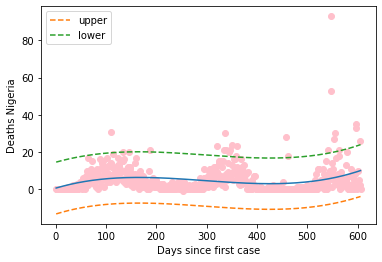

In [122]:
_,upper,lower=wls_prediction_std(poly3_d_n)
plt.scatter(deaths_n.Number_days_Day1,deaths_n.new_deaths,color='pink')
plt.plot(deaths_n.Number_days_Day1,poly3_d_n.predict(deaths_n.Number_days_Day1))
plt.plot(deaths_n.Number_days_Day1,upper,'--',label='upper')
plt.plot(deaths_n.Number_days_Day1,lower,'--',label='lower')
plt.xlabel('Days since first case')
plt.ylabel('Deaths Nigeria')
plt.legend()


Pakistan

In [123]:
Pak_data=owid_df[owid_df['location']=='Pakistan']
Pak_data[['total_cases','new_cases','new_deaths','total_deaths']]=Pak_data[['total_cases','new_cases','new_deaths','total_deaths']].fillna(0)
Pak_data=Pak_data[Pak_data['total_cases']>0]
Pak_data['date']=Pak_data['date'].astype('datetime64[ns]')
Pak_data=Pak_data[['location','date','new_cases','new_deaths']]
Pak_data=Pak_data[Pak_data['date']!='2020-02-25']
l=[]
for i in range(0,len(Pak_data)):
    day=i+1
    l.append(day)
Pak_data['Number_days_Day1']=l


C:\Users\chand\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [124]:
Pak_data

,location,date,new_cases,new_deaths,Number_days_Day1
86835,Pakistan,2020-02-26,0.0,0.0,1
86836,Pakistan,2020-02-27,0.0,0.0,2
86837,Pakistan,2020-02-28,2.0,0.0,3
86838,Pakistan,2020-02-29,0.0,0.0,4
86839,Pakistan,2020-03-01,0.0,0.0,5
...,...,...,...,...,...
87439,Pakistan,2021-10-22,552.0,15.0,605
87440,Pakistan,2021-10-23,591.0,18.0,606
87441,Pakistan,2021-10-24,698.0,9.0,607
87442,Pakistan,2021-10-25,572.0,6.0,608


In [125]:
cases_p=Pak_data[['new_cases','Number_days_Day1']]
lm_p = smf.ols(formula='new_cases~Number_days_Day1', data=cases_p).fit()
pred_p=lm_p.predict(cases_p.Number_days_Day1)
x_new_p=pd.DataFrame({'Number_days_Day1':[610,611,612,613,614,615,616]})
pred_next_p=lm_p.predict(x_new_p.Number_days_Day1)

In [126]:
pred_next_p

0    3018.243907
1    3021.300735
2    3024.357563
3    3027.414392
4    3030.471220
5    3033.528048
6    3036.584876
dtype: float64

In [127]:
print('lm_p_rsquared',lm_p.rsquared)
print('lm_p_pvalues',lm_p.pvalues)

lm_p_rsquared 0.10693485769351962
lm_p_pvalues Intercept           9.363252e-19
Number_days_Day1    1.210250e-16
dtype: float64


In [128]:
m.rmse(cases_p.new_cases,pred_p)

1553.0270691798262

In [129]:
lm_p.conf_int()

,0,1
Intercept,905.685530,1401.471976
Number_days_Day1,2.352665,3.760992


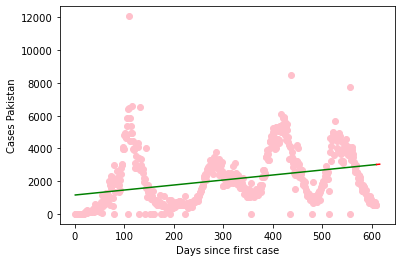

In [130]:
plt.scatter(cases_p.Number_days_Day1,cases_p.new_cases,color='pink')
plt.plot(cases_p.Number_days_Day1,pred_p,color='green')
plt.plot(x_new_p.Number_days_Day1,pred_next_p,color='red')
plt.xlabel('Days since first case')
plt.ylabel('Cases Pakistan')
plt.show()


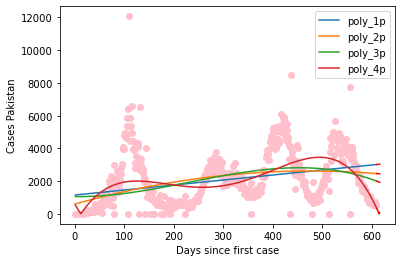

In [131]:
plt.scatter(cases_p.Number_days_Day1,cases_p.new_cases,color='pink')
poly1p=smf.ols(formula='new_cases ~ 1+Number_days_Day1',data=cases_p).fit()

plt.plot(cases_p.Number_days_Day1,poly1p.predict(cases_p.Number_days_Day1),label='poly_1p')
plt.plot(x_new_p.Number_days_Day1,poly1p.predict(x_new_p.Number_days_Day1),color='red')

poly2p=smf.ols(formula='new_cases ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)',data=cases_p).fit()

plt.plot(cases_p.Number_days_Day1,poly2p.predict(cases_p.Number_days_Day1),label='poly_2p')
plt.plot(x_new_p.Number_days_Day1,poly2p.predict(x_new_p.Number_days_Day1),color='red')

poly3p=smf.ols(formula='new_cases ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)',data=cases_p).fit()

plt.plot(cases_p.Number_days_Day1,poly3p.predict(cases_p.Number_days_Day1),label='poly_3p')
plt.plot(x_new_p.Number_days_Day1,poly3p.predict(x_new_p.Number_days_Day1),color='red')

poly4p=smf.ols(formula='new_cases ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)+I(Number_days_Day1**4.0)',data=cases_p).fit()

plt.plot(cases_p.Number_days_Day1,poly4p.predict(cases_p.Number_days_Day1).abs(),label='poly_4p')
plt.plot(x_new_p.Number_days_Day1,poly4p.predict(x_new_p.Number_days_Day1).abs(),color='red')
plt.xlabel('Days since first case')
plt.ylabel('Cases Pakistan')
plt.legend()

In [132]:
print('poly1p_rsquared',poly1p.rsquared)
print('poly2p_rsquared',poly2p.rsquared)
print('poly3p_rsquared',poly3p.rsquared)
print('poly4p_rsquared',poly4p.rsquared)
print('poly1p_pvalues',poly1p.pvalues)
print('poly2p_pvalues',poly2p.pvalues)
print('poly3p_pvalues',poly3p.pvalues)
print('poly4p_pvalues',poly4p.pvalues)


poly1p_rsquared 0.10693485769351962
poly2p_rsquared 0.12944156244297245
poly3p_rsquared 0.14049648132250359
poly4p_rsquared 0.25003617244215803
poly1p_pvalues Intercept           9.363252e-19
Number_days_Day1    1.210250e-16
dtype: float64
poly2p_pvalues Intercept                     1.455571e-03
Number_days_Day1              3.673303e-09
I(Number_days_Day1 ** 2.0)    8.448414e-05
dtype: float64
poly3p_pvalues Intercept                     0.000024
Number_days_Day1              0.876907
I(Number_days_Day1 ** 2.0)    0.037185
I(Number_days_Day1 ** 3.0)    0.005445
dtype: float64
poly4p_pvalues Intercept                     4.146125e-02
Number_days_Day1              4.127627e-15
I(Number_days_Day1 ** 2.0)    4.145963e-16
I(Number_days_Day1 ** 3.0)    4.462005e-18
I(Number_days_Day1 ** 4.0)    1.183551e-19
dtype: float64


In [133]:
print('ploy1p_rmse',m.rmse(cases_p.new_cases,poly1p.predict(cases_p.Number_days_Day1)))
print('ploy2p_rmse',m.rmse(cases_p.new_cases,poly2p.predict(cases_p.Number_days_Day1)))
print('ploy3p_rmse',m.rmse(cases_p.new_cases,poly3p.predict(cases_p.Number_days_Day1)))
print('ploy4p_rmse',m.rmse(cases_p.new_cases,poly4p.predict(cases_p.Number_days_Day1)))

ploy1p_rmse 1553.0270691798262
ploy2p_rmse 1533.3327820461714
ploy3p_rmse 1523.5660469822362
ploy4p_rmse 1423.172734103979


In [134]:
poly1p.conf_int()

,0,1
Intercept,905.685530,1401.471976
Number_days_Day1,2.352665,3.760992


In [135]:
poly2p.conf_int()

,0,1
Intercept,231.383978,967.753021
Number_days_Day1,5.709654,11.284728
I(Number_days_Day1 ** 2.0),-0.013344,-0.004494


In [136]:
poly3p.conf_int()

,0,1
Intercept,571.650958,1550.850253
Number_days_Day1,-7.493213,6.397214
I(Number_days_Day1 ** 2.0),0.001676,0.054567
I(Number_days_Day1 ** 3.0),-0.000069,-0.000012


In [137]:
poly3p.conf_int()

,0,1
Intercept,571.650958,1550.850253
Number_days_Day1,-7.493213,6.397214
I(Number_days_Day1 ** 2.0),0.001676,0.054567
I(Number_days_Day1 ** 3.0),-0.000069,-0.000012


Poly4p is the best fit for pakistan<br/>
Confidence interval for pakistan

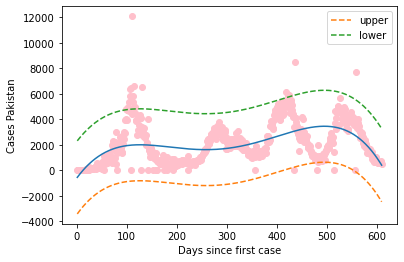

In [138]:
_,upper,lower=wls_prediction_std(poly4p)
plt.scatter(cases_p.Number_days_Day1,cases_p.new_cases,color='pink')
plt.plot(cases_p.Number_days_Day1,poly4p.predict(cases_p.Number_days_Day1))
plt.plot(cases_p.Number_days_Day1,upper,'--',label='upper')
plt.plot(cases_p.Number_days_Day1,lower,'--',label='lower')
plt.xlabel('Days since first case')
plt.ylabel('Cases Pakistan')
plt.legend()

Deaths

In [139]:
deaths_p=Pak_data[['new_deaths','Number_days_Day1']]
lm_d_p = smf.ols(formula='new_deaths~Number_days_Day1', data=deaths_p).fit()
pred_deaths_p=lm_d_p.predict(deaths_p.Number_days_Day1)
x_new_deaths_p=pd.DataFrame({'Number_days_Day1':[610,611,612,613,614,615,616]})
pred_next_deaths_p=lm_d_p.predict(x_new_deaths_p.Number_days_Day1)

In [140]:
pred_next_deaths_p

0    69.633367
1    69.708748
2    69.784130
3    69.859511
4    69.934892
5    70.010274
6    70.085655
dtype: float64

In [141]:
print('lm_d_p_rsquared',lm_d_p.rsquared)
print('lm_d_p_pvalues',lm_d_p.pvalues)

lm_d_p_rsquared 0.11360031509578061
lm_d_p_pvalues Intercept           1.749820e-14
Number_days_Day1    1.209655e-17
dtype: float64


In [142]:
m.rmse(deaths_p.new_deaths,pred_deaths_p)

37.018207159137354

In [143]:
lm_d_p.conf_int()

,0,1
Intercept,17.741882,29.559529
Number_days_Day1,0.058597,0.092166


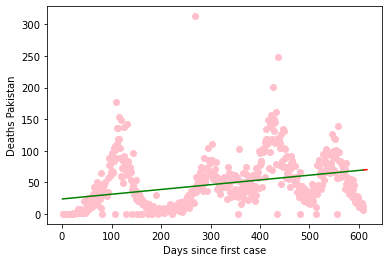

In [144]:
plt.scatter(deaths_p.Number_days_Day1,deaths_p.new_deaths,color='pink')
plt.plot(deaths_p.Number_days_Day1,pred_deaths_p,color='green')
plt.plot(x_new_deaths_p.Number_days_Day1,pred_next_deaths_p,color='red')
plt.xlabel('Days since first case')
plt.ylabel('Deaths Pakistan')
plt.show()

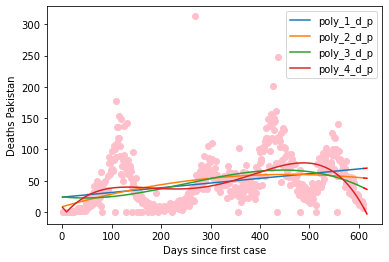

In [145]:
plt.scatter(deaths_p.Number_days_Day1,deaths_p.new_deaths,color='pink')
poly1_d_p=smf.ols(formula='new_deaths ~ 1+Number_days_Day1',data=deaths_p).fit()

plt.plot(deaths_p.Number_days_Day1,poly1_d_p.predict(deaths_p.Number_days_Day1),label='poly_1_d_p')
plt.plot(x_new_deaths_p.Number_days_Day1,poly1_d_p.predict(x_new_deaths_p.Number_days_Day1),color='red')

poly2_d_p=smf.ols(formula='new_deaths ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)',data=deaths_p).fit()

plt.plot(deaths_p.Number_days_Day1,poly2_d_p.predict(deaths_p.Number_days_Day1),label='poly_2_d_p')
plt.plot(x_new_deaths_p.Number_days_Day1,poly2_d_p.predict(x_new_deaths_p.Number_days_Day1),color='red')

poly3_d_p=smf.ols(formula='new_deaths ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)',data=deaths_p).fit()

plt.plot(deaths_p.Number_days_Day1,poly3_d_p.predict(deaths_p.Number_days_Day1),label='poly_3_d_p')
plt.plot(x_new_deaths_p.Number_days_Day1,poly3_d_p.predict(x_new_deaths_p.Number_days_Day1),color='red')

poly4_d_p=smf.ols(formula='new_deaths ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)+I(Number_days_Day1**4.0)',data=deaths_p).fit()

plt.plot(deaths_p.Number_days_Day1,poly4_d_p.predict(deaths_p.Number_days_Day1).abs(),label='poly_4_d_p')
plt.plot(x_new_deaths_p.Number_days_Day1,poly4_d_p.predict(x_new_deaths_p.Number_days_Day1),color='red')
plt.xlabel('Days since first case')
plt.ylabel('Deaths Pakistan')
plt.legend()

In [146]:
print('poly1_d_p.rsquared',poly1_d_p.rsquared)
print('poly2_d_p.rsquared',poly2_d_p.rsquared)
print('poly3_d_p.rsquared',poly3_d_p.rsquared)
print('poly4_d_p.rsquared',poly4_d_p.rsquared)
print('poly1_d_p_pvalues',poly1_d_p.pvalues)
print('poly2_d_p_pvalues',poly2_d_p.pvalues)
print('poly3_d_p_pvalues',poly3_d_p.pvalues)
print('poly4_d_p_pvalues',poly4_d_p.pvalues)


poly1_d_p.rsquared 0.11360031509578061
poly2_d_p.rsquared 0.1435937491886703
poly3_d_p.rsquared 0.16646289084234833
poly4_d_p.rsquared 0.2401280857463467
poly1_d_p_pvalues Intercept           1.749820e-14
Number_days_Day1    1.209655e-17
dtype: float64
poly2_d_p_pvalues Intercept                     6.104569e-02
Number_days_Day1              4.797983e-11
I(Number_days_Day1 ** 2.0)    4.984467e-06
dtype: float64
poly3_d_p_pvalues Intercept                     0.000042
Number_days_Day1              0.304568
I(Number_days_Day1 ** 2.0)    0.001257
I(Number_days_Day1 ** 3.0)    0.000052
dtype: float64
poly4_d_p_pvalues Intercept                     2.385438e-01
Number_days_Day1              1.929934e-09
I(Number_days_Day1 ** 2.0)    3.808088e-10
I(Number_days_Day1 ** 3.0)    4.585623e-12
I(Number_days_Day1 ** 4.0)    7.856652e-14
dtype: float64


In [147]:
print('poly1_d_p_rmse',m.rmse(deaths_p.new_deaths,poly1_d_p.predict(deaths_p.Number_days_Day1)))
print('poly2_d_p_rmse',m.rmse(deaths_p.new_deaths,poly2_d_p.predict(deaths_p.Number_days_Day1)))
print('poly3_d_p_rmse',m.rmse(deaths_p.new_deaths,poly3_d_p.predict(deaths_p.Number_days_Day1)))
print('poly4_d_p_rmse',m.rmse(deaths_p.new_deaths,poly4_d_p.predict(deaths_p.Number_days_Day1)))

poly1_d_p_rmse 37.018207159137354
poly2_d_p_rmse 36.3865181139086
poly3_d_p_rmse 35.89740498627987
poly4_d_p_rmse 34.27447264500942


In [148]:
poly1_d_p.conf_int()

,0,1
Intercept,17.741882,29.559529
Number_days_Day1,0.058597,0.092166


In [149]:
poly2_d_p.conf_int()

,0,1
Intercept,-0.388084,17.086208
Number_days_Day1,0.159494,0.291792
I(Number_days_Day1 ** 2.0),-0.000351,-0.000141


In [150]:
poly3_d_p.conf_int()

,0,1
Intercept,12.700809,3.577215e+01
Number_days_Day1,-0.249260,7.801891e-02
I(Number_days_Day1 ** 2.0),0.000405,1.651392e-03
I(Number_days_Day1 ** 3.0),-0.000002,-7.215429e-07


In [151]:
poly4_d_p.conf_int()

,0,1
Intercept,-2.213891e+01,5.521863e+00
Number_days_Day1,6.599948e-01,1.287225e+00
I(Number_days_Day1 ** 2.0),-8.859055e-03,-4.682451e-03
I(Number_days_Day1 ** 3.0),1.334265e-05,2.362606e-05
I(Number_days_Day1 ** 4.0),-2.047451e-08,-1.211137e-08


Poly4_d_p is best for pakistan deaths.<br/>
Confidence interval for Pakistan

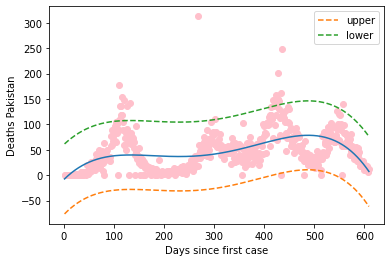

In [152]:
_,upper,lower=wls_prediction_std(poly4_d_p)
plt.scatter(deaths_p.Number_days_Day1,deaths_p.new_deaths,color='pink')
plt.plot(deaths_p.Number_days_Day1,poly4_d_p.predict(deaths_p.Number_days_Day1))
plt.plot(deaths_p.Number_days_Day1,upper,'--',label='upper')
plt.plot(deaths_p.Number_days_Day1,lower,'--',label='lower')
plt.xlabel('Days since first case')
plt.ylabel('Deaths Pakistan')
plt.legend()

Bangladesh

In [153]:
Bgl_data=owid_df[owid_df['location']=='Bangladesh']
Bgl_data[['total_cases','new_cases','new_deaths','total_deaths']]=Bgl_data[['total_cases','new_cases','new_deaths','total_deaths']].fillna(0)
Bgl_data=Bgl_data[Bgl_data['total_cases']>0]
Bgl_data['date']=Bgl_data['date'].astype('datetime64[ns]')
Bgl_data=Bgl_data[['location','date','new_cases','new_deaths']]
Bgl_data=Bgl_data[Bgl_data['date']!='2020-03-08']
l=[]
for i in range(0,len(Bgl_data)):
    day=i+1
    l.append(day)
Bgl_data['Number_days_Day1']=l

C:\Users\chand\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [154]:
Bgl_data

,location,date,new_cases,new_deaths,Number_days_Day1
9678,Bangladesh,2020-03-09,0.0,0.0,1
9679,Bangladesh,2020-03-10,0.0,0.0,2
9680,Bangladesh,2020-03-11,0.0,0.0,3
9681,Bangladesh,2020-03-12,0.0,0.0,4
9682,Bangladesh,2020-03-13,0.0,0.0,5
...,...,...,...,...,...
10270,Bangladesh,2021-10-22,232.0,4.0,593
10271,Bangladesh,2021-10-23,278.0,9.0,594
10272,Bangladesh,2021-10-24,275.0,9.0,595
10273,Bangladesh,2021-10-25,289.0,5.0,596


In [155]:
cases_bg=Bgl_data[['new_cases','Number_days_Day1']]
lm_bg = smf.ols(formula='new_cases~Number_days_Day1', data=cases_bg).fit()
pred_bg=lm_bg.predict(cases_bg.Number_days_Day1)
x_new_bg=pd.DataFrame({'Number_days_Day1':[598,599,600,601,602,603,604]})
pred_next_bg=lm_bg.predict(x_new_bg.Number_days_Day1)

In [156]:
pred_next_bg

0    4593.890195
1    4600.468787
2    4607.047379
3    4613.625971
4    4620.204564
5    4626.783156
6    4633.361748
dtype: float64

In [157]:
print('lm_bg_rsquared',lm_bg.rsquared)
print('lm_bg_pvalues',lm_bg.pvalues)

lm_bg_rsquared 0.1458385825195212
lm_bg_pvalues Intercept           3.524254e-03
Number_days_Day1    3.643652e-22
dtype: float64


In [158]:
m.rmse(cases_bg.new_cases,pred_bg)

2743.783395799329

In [159]:
lm_bg.conf_int()

,0,1
Intercept,217.507884,1102.276216
Number_days_Day1,5.296732,7.860452


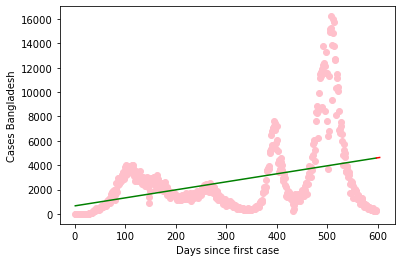

In [160]:
plt.scatter(cases_bg.Number_days_Day1,cases_bg.new_cases,color='pink')
plt.plot(cases_bg.Number_days_Day1,pred_bg,color='green')
plt.plot(x_new_bg.Number_days_Day1,pred_next_bg,color='red')
plt.xlabel('Days since first case')
plt.ylabel('Cases Bangladesh')
plt.show()


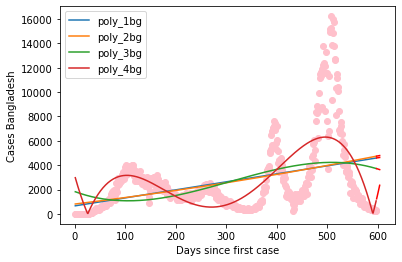

In [161]:
plt.scatter(cases_bg.Number_days_Day1,cases_bg.new_cases,color='pink')
poly1bg=smf.ols(formula='new_cases ~ 1+Number_days_Day1',data=cases_bg).fit()

plt.plot(cases_bg.Number_days_Day1,poly1bg.predict(cases_bg.Number_days_Day1),label='poly_1bg')
plt.plot(x_new_bg.Number_days_Day1,poly1bg.predict(x_new_bg.Number_days_Day1),color='red')

poly2bg=smf.ols(formula='new_cases ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)',data=cases_bg).fit()

plt.plot(cases_bg.Number_days_Day1,poly2bg.predict(cases_bg.Number_days_Day1),label='poly_2bg')
plt.plot(x_new_bg.Number_days_Day1,poly2bg.predict(x_new_bg.Number_days_Day1),color='red')

poly3bg=smf.ols(formula='new_cases ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)',data=cases_bg).fit()

plt.plot(cases_bg.Number_days_Day1,poly3bg.predict(cases_bg.Number_days_Day1),label='poly_3bg')
plt.plot(x_new_bg.Number_days_Day1,poly3bg.predict(x_new_bg.Number_days_Day1),color='red')

poly4bg=smf.ols(formula='new_cases ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)+I(Number_days_Day1**4.0)',data=cases_bg).fit()

plt.plot(cases_bg.Number_days_Day1,poly4bg.predict(cases_bg.Number_days_Day1).abs(),label='poly_4bg')
plt.plot(x_new_bg.Number_days_Day1,poly4bg.predict(x_new_bg.Number_days_Day1).abs(),color='red')
plt.xlabel('Days since first case')
plt.ylabel('Cases Bangladesh')
plt.legend()

In [162]:
print('poly1bg_rsquared',poly1bg.rsquared)
print('poly2bg_rsquared',poly2bg.rsquared)
print('poly3bg_rsquared',poly3bg.rsquared)
print('poly4bg_rsquared',poly4bg.rsquared)
print('poly1bg.pvalues',poly1bg.pvalues)
print('poly2bg.pvalues',poly2bg.pvalues)
print('poly3bg.pvalues',poly3bg.pvalues)
print('poly4bg.pvalues',poly4bg.pvalues)


poly1bg_rsquared 0.1458385825195212
poly2bg_rsquared 0.14634273824069322
poly3bg_rsquared 0.16308994500922314
poly4bg_rsquared 0.46272082523600766
poly1bg.pvalues Intercept           3.524254e-03
Number_days_Day1    3.643652e-22
dtype: float64
poly2bg.pvalues Intercept                     0.017154
Number_days_Day1              0.052741
I(Number_days_Day1 ** 2.0)    0.553882
dtype: float64
poly3bg.pvalues Intercept                     0.000049
Number_days_Day1              0.017780
I(Number_days_Day1 ** 2.0)    0.000507
I(Number_days_Day1 ** 3.0)    0.000612
dtype: float64
poly4bg.pvalues Intercept                     1.260809e-11
Number_days_Day1              6.205215e-40
I(Number_days_Day1 ** 2.0)    5.406216e-49
I(Number_days_Day1 ** 3.0)    1.550114e-55
I(Number_days_Day1 ** 4.0)    5.802596e-59
dtype: float64


In [163]:
print('ploy1bg_rmse',m.rmse(cases_bg.new_cases,poly1bg.predict(cases_bg.Number_days_Day1)))
print('ploy2bg_rmse',m.rmse(cases_bg.new_cases,poly2bg.predict(cases_bg.Number_days_Day1)))
print('ploy3bg_rmse',m.rmse(cases_bg.new_cases,poly3bg.predict(cases_bg.Number_days_Day1)))
print('ploy4bg_rmse',m.rmse(cases_bg.new_cases,poly4bg.predict(cases_bg.Number_days_Day1)))

ploy1bg_rmse 2743.783395799329
ploy2bg_rmse 2742.973538174268
ploy3bg_rmse 2715.934183267919
ploy4bg_rmse 2176.1050264043974


In [164]:
poly1bg.conf_int()

,0,1
Intercept,217.507884,1102.276216
Number_days_Day1,5.296732,7.860452


In [165]:
poly2bg.conf_int()

,0,1
Intercept,144.363591,1475.032773
Number_days_Day1,-0.060312,10.216372
I(Number_days_Day1 ** 2.0),-0.005811,0.010830


In [166]:
poly3bg.conf_int()

,0,1
Intercept,954.748221,2718.148810
Number_days_Day1,-28.197984,-2.681725
I(Number_days_Day1 ** 2.0),0.038660,0.137769
I(Number_days_Day1 ** 3.0),-0.000150,-0.000041


In [167]:
poly4bg.conf_int()

,0,1
Intercept,-4008.289129,-2233.955742
Number_days_Day1,128.605870,169.646271
I(Number_days_Day1 ** 2.0),-1.287120,-1.008362
I(Number_days_Day1 ** 3.0),0.002768,0.003468
I(Number_days_Day1 ** 4.0),-0.000003,-0.000002


Linear model is the best fit<br/>
Confidence interval

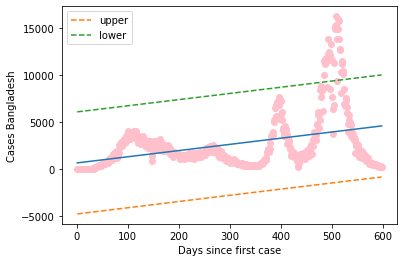

In [168]:
_,upper,lower=wls_prediction_std(poly1bg)
plt.scatter(cases_bg.Number_days_Day1,cases_bg.new_cases,color='pink')
plt.plot(cases_bg.Number_days_Day1,poly1bg.predict(cases_bg.Number_days_Day1))
plt.plot(cases_bg.Number_days_Day1,upper,'--',label='upper')
plt.plot(cases_bg.Number_days_Day1,lower,'--',label='lower')
plt.xlabel('Days since first case')
plt.ylabel('Cases Bangladesh')
plt.legend()

Deaths Bangladesh

In [169]:
deaths_bg=Bgl_data[['new_deaths','Number_days_Day1']]
lm_d_bg = smf.ols(formula='new_deaths~Number_days_Day1', data=deaths_bg).fit()
pred_deaths_bg=lm_d_bg.predict(deaths_bg.Number_days_Day1)
x_new_deaths_bg=pd.DataFrame({'Number_days_Day1':[598,599,600,601,602,603,604]})
pred_next_deaths_bg=lm_d_bg.predict(x_new_deaths_bg.Number_days_Day1)

In [170]:
pred_next_deaths_bg

0    92.281508
1    92.434212
2    92.586916
3    92.739619
4    92.892323
5    93.045026
6    93.197730
dtype: float64

In [171]:
print('lm_d_bg_rsquared',lm_d_bg.rsquared)
print('lm_d_bg_pvalues',lm_d_bg.pvalues)

lm_d_bg_rsquared 0.2276970779246532
lm_d_bg_pvalues Intercept           8.085084e-01
Number_days_Day1    2.819819e-35
dtype: float64


In [172]:
m.rmse(deaths_bg.new_deaths,pred_deaths_bg)

48.46716747240787

In [173]:
lm_d_bg.conf_int()

,0,1
Intercept,-6.849709,8.779154
Number_days_Day1,0.130060,0.175347


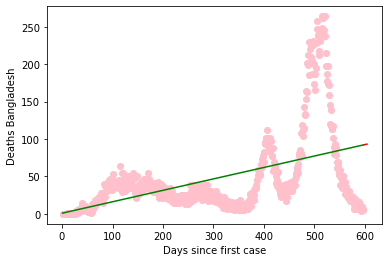

In [174]:
plt.scatter(deaths_bg.Number_days_Day1,deaths_bg.new_deaths,color='pink')
plt.plot(deaths_bg.Number_days_Day1,pred_deaths_bg,color='green')
plt.plot(x_new_deaths_bg.Number_days_Day1,pred_next_deaths_bg,color='red')
plt.xlabel('Days since first case')
plt.ylabel('Deaths Bangladesh')
plt.show()

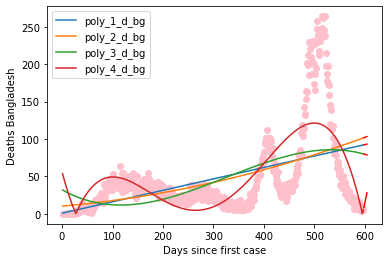

In [175]:
plt.scatter(deaths_bg.Number_days_Day1,deaths_bg.new_deaths,color='pink')
poly1_d_bg=smf.ols(formula='new_deaths ~ 1+Number_days_Day1',data=deaths_bg).fit()

plt.plot(deaths_bg.Number_days_Day1,poly1_d_bg.predict(deaths_bg.Number_days_Day1),label='poly_1_d_bg')
plt.plot(x_new_deaths_bg.Number_days_Day1,poly1_d_bg.predict(x_new_deaths_bg.Number_days_Day1),color='red')

poly2_d_bg=smf.ols(formula='new_deaths ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)',data=deaths_bg).fit()

plt.plot(deaths_bg.Number_days_Day1,poly2_d_bg.predict(deaths_bg.Number_days_Day1),label='poly_2_d_bg')
plt.plot(x_new_deaths_bg.Number_days_Day1,poly2_d_bg.predict(x_new_deaths_bg.Number_days_Day1),color='red')

poly3_d_bg=smf.ols(formula='new_deaths ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)',data=deaths_bg).fit()

plt.plot(deaths_bg.Number_days_Day1,poly3_d_bg.predict(deaths_bg.Number_days_Day1),label='poly_3_d_bg')
plt.plot(x_new_deaths_bg.Number_days_Day1,poly3_d_bg.predict(x_new_deaths_bg.Number_days_Day1),color='red')

poly4_d_bg=smf.ols(formula='new_deaths ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)+I(Number_days_Day1**4.0)',data=deaths_bg).fit()

plt.plot(deaths_bg.Number_days_Day1,poly4_d_bg.predict(deaths_bg.Number_days_Day1).abs(),label='poly_4_d_bg')
plt.plot(x_new_deaths_bg.Number_days_Day1,poly4_d_bg.predict(x_new_deaths_bg.Number_days_Day1).abs(),color='red')
plt.xlabel('Days since first case')
plt.ylabel('Deaths Bangladesh')
plt.legend()

In [176]:
print('poly1_d_bg_rsquared',poly1_d_bg.rsquared)
print('poly2_d_bg_rsquared',poly2_d_bg.rsquared)
print('poly3_d_bg_rsquared',poly3_d_bg.rsquared)
print('poly4_d_bg_rsquared',poly4_d_bg.rsquared)
print('poly1_d_bg_pvalues',poly1_d_bg.pvalues)
print('poly2_d_bg_pvalues',poly2_d_bg.pvalues)
print('poly3_d_bg_pvalues',poly3_d_bg.pvalues)
print('poly4_d_bg_pvalues',poly4_d_bg.pvalues)


poly1_d_bg_rsquared 0.2276970779246532
poly2_d_bg_rsquared 0.23353599688018067
poly3_d_bg_rsquared 0.2554023072403059
poly4_d_bg_rsquared 0.5316404408623572
poly1_d_bg_pvalues Intercept           8.085084e-01
Number_days_Day1    2.819819e-35
dtype: float64
poly2_d_bg_pvalues Intercept                     0.080640
Number_days_Day1              0.209660
I(Number_days_Day1 ** 2.0)    0.033813
dtype: float64
poly3_d_bg_pvalues Intercept                     0.000048
Number_days_Day1              0.000962
I(Number_days_Day1 ** 2.0)    0.000009
I(Number_days_Day1 ** 3.0)    0.000035
dtype: float64
poly4_d_bg_pvalues Intercept                     2.203918e-12
Number_days_Day1              3.378523e-39
I(Number_days_Day1 ** 2.0)    1.239376e-49
I(Number_days_Day1 ** 3.0)    1.639810e-57
I(Number_days_Day1 ** 4.0)    1.356325e-61
dtype: float64


In [177]:
print('poly1_d_bg_rmse',m.rmse(deaths_bg.new_deaths,poly1_d_bg.predict(deaths_bg.Number_days_Day1)))
print('poly2_d_bg_rmse',m.rmse(deaths_bg.new_deaths,poly2_d_bg.predict(deaths_bg.Number_days_Day1)))
print('poly3_d_bg_rmse',m.rmse(deaths_bg.new_deaths,poly3_d_bg.predict(deaths_bg.Number_days_Day1)))
print('poly4_d_bg_rmse',m.rmse(deaths_bg.new_deaths,poly4_d_bg.predict(deaths_bg.Number_days_Day1)))

poly1_d_bg_rmse 48.46716747240787
poly2_d_bg_rmse 48.28360427664336
poly3_d_bg_rmse 47.589883692804484
poly4_d_bg_rmse 37.74361508738444


In [178]:
poly1_d_bg.conf_int()

,0,1
Intercept,-6.849709,8.779154
Number_days_Day1,0.130060,0.175347


In [179]:
poly2_d_bg.conf_int()

,0,1
Intercept,-1.276113,22.147192
Number_days_Day1,-0.032611,0.148286
I(Number_days_Day1 ** 2.0),0.000012,0.000305


In [180]:
poly3_d_bg.conf_int()

,0,1
Intercept,16.780894,47.680033
Number_days_Day1,-0.601252,-0.154144
I(Number_days_Day1 ** 2.0),0.001110,0.002846
I(Number_days_Day1 ** 3.0),-0.000003,-0.000001


In [181]:
poly4_d_bg.conf_int()

,0,1
Intercept,-7.158540e+01,-4.081034e+01
Number_days_Day1,2.201755e+00,2.913583e+00
I(Number_days_Day1 ** 2.0),-2.248532e-02,-1.765040e-02
I(Number_days_Day1 ** 3.0),4.921511e-05,6.135820e-05
I(Number_days_Day1 ** 4.0),-5.295896e-08,-4.288524e-08


Poly3 is best fit for Bangladesh<br/>
Confidence interval for Bangladesh deaths

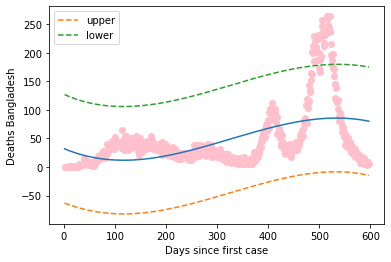

In [182]:
_,upper,lower=wls_prediction_std(poly3_d_bg)
plt.scatter(deaths_bg.Number_days_Day1,deaths_bg.new_deaths,color='pink')
plt.plot(deaths_bg.Number_days_Day1,poly3_d_bg.predict(deaths_bg.Number_days_Day1))
plt.plot(deaths_bg.Number_days_Day1,upper,'--',label='upper')
plt.plot(deaths_bg.Number_days_Day1,lower,'--',label='lower')
plt.xlabel('Days since first case')
plt.ylabel('Deaths Bangladesh')
plt.legend()

Indonesia

In [183]:
IDN_data=owid_df[owid_df['location']=='Indonesia']
IDN_data[['total_cases','new_cases','new_deaths','total_deaths']]=IDN_data[['total_cases','new_cases','new_deaths','total_deaths']].fillna(0)
IDN_data=IDN_data[IDN_data['total_cases']>0]
IDN_data['date']=IDN_data['date'].astype('datetime64[ns]')
IDN_data=IDN_data[['location','date','new_cases','new_deaths']]
IDN_data=IDN_data[IDN_data['date']!='2020-03-02']
l=[]
for i in range(0,len(IDN_data)):
    day=i+1
    l.append(day)
IDN_data['Number_days_Day1']=l


C:\Users\chand\Anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [184]:
IDN_data

,location,date,new_cases,new_deaths,Number_days_Day1
52845,Indonesia,2020-03-03,0.0,0.0,1
52846,Indonesia,2020-03-04,0.0,0.0,2
52847,Indonesia,2020-03-05,0.0,0.0,3
52848,Indonesia,2020-03-06,2.0,0.0,4
52849,Indonesia,2020-03-07,0.0,0.0,5
...,...,...,...,...,...
53443,Indonesia,2021-10-22,760.0,33.0,599
53444,Indonesia,2021-10-23,802.0,23.0,600
53445,Indonesia,2021-10-24,623.0,29.0,601
53446,Indonesia,2021-10-25,460.0,30.0,602


In [185]:
cases_i=IDN_data[['new_cases','Number_days_Day1']]
lm_i = smf.ols(formula='new_cases~Number_days_Day1', data=cases_i).fit()
pred_i=lm_i.predict(cases_i.Number_days_Day1)
x_new_i=pd.DataFrame({'Number_days_Day1':[604,605,606,607,608,609,610]})
pred_next_i=lm_i.predict(x_new_i.Number_days_Day1)

In [186]:
pred_next_i

0    15516.195914
1    15544.284929
2    15572.373944
3    15600.462959
4    15628.551973
5    15656.640988
6    15684.730003
dtype: float64

In [187]:
print('lm_i_rsquared',lm_i.rsquared)
print('lm_i_pvalues',lm_i.pvalues)

lm_i_rsquared 0.25260858486482385
lm_i_pvalues Intercept           3.526657e-02
Number_days_Day1    6.459489e-40
dtype: float64


In [188]:
m.rmse(cases_i.new_cases,pred_i)

8410.321523198305

In [189]:
lm_i.conf_int()

,0,1
Intercept,-2798.747281,-100.390816
Number_days_Day1,24.218463,31.959566


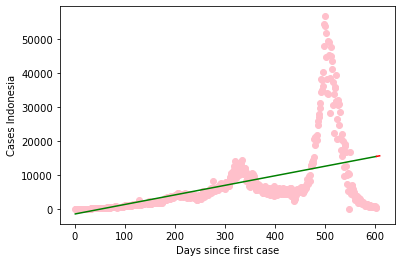

In [190]:
plt.scatter(cases_i.Number_days_Day1,cases_i.new_cases,color='pink')
plt.plot(cases_i.Number_days_Day1,pred_i,color='green')
plt.plot(x_new_i.Number_days_Day1,pred_next_i,color='red')
plt.xlabel('Days since first case')
plt.ylabel('Cases Indonesia')
plt.show()

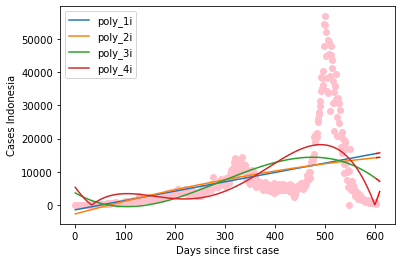

In [191]:
plt.scatter(cases_i.Number_days_Day1,cases_i.new_cases,color='pink')
poly1i=smf.ols(formula='new_cases ~ 1+Number_days_Day1',data=cases_i).fit()

plt.plot(cases_i.Number_days_Day1,poly1i.predict(cases_i.Number_days_Day1),label='poly_1i')
plt.plot(x_new_i.Number_days_Day1,poly1i.predict(x_new_i.Number_days_Day1),color='red')

poly2i=smf.ols(formula='new_cases ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)',data=cases_i).fit()

plt.plot(cases_i.Number_days_Day1,poly2i.predict(cases_i.Number_days_Day1),label='poly_2i')
plt.plot(x_new_i.Number_days_Day1,poly2i.predict(x_new_i.Number_days_Day1),color='red')

poly3i=smf.ols(formula='new_cases ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)',data=cases_i).fit()

plt.plot(cases_i.Number_days_Day1,poly3i.predict(cases_i.Number_days_Day1),label='poly_3i')
plt.plot(x_new_i.Number_days_Day1,poly3i.predict(x_new_i.Number_days_Day1),color='red')

poly4i=smf.ols(formula='new_cases ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)+I(Number_days_Day1**4.0)',data=cases_i).fit()

plt.plot(cases_i.Number_days_Day1,poly4i.predict(cases_i.Number_days_Day1).abs(),label='poly_4i')
plt.plot(x_new_i.Number_days_Day1,poly4i.predict(x_new_i.Number_days_Day1).abs(),color='red')
plt.xlabel('Days since first case')
plt.ylabel('Cases Indonesia')
plt.legend()

In [192]:
print('poly1i_rsquared',poly1i.rsquared)
print('poly2i_rsquared',poly2i.rsquared)
print('poly3i_rsquared',poly3i.rsquared)
print('poly4i_rsquared',poly4i.rsquared)
print('poly1i_pvalues',poly1i.pvalues)
print('poly2i_pvalues',poly2i.pvalues)
print('poly3i_pvalues',poly3i.pvalues)
print('poly4i_pvalues',poly4i.pvalues)

poly1i_rsquared 0.25260858486482385
poly2i_rsquared 0.25592237123723505
poly3i_rsquared 0.3171483326850829
poly4i_rsquared 0.414845919659106
poly1i_pvalues Intercept           3.526657e-02
Number_days_Day1    6.459489e-40
dtype: float64
poly2i_pvalues Intercept                     8.855816e-03
Number_days_Day1              3.621354e-07
I(Number_days_Day1 ** 2.0)    1.026438e-01
dtype: float64
poly3i_pvalues Intercept                     5.005734e-03
Number_days_Day1              5.723274e-06
I(Number_days_Day1 ** 2.0)    1.003705e-11
I(Number_days_Day1 ** 3.0)    7.564038e-13
dtype: float64
poly4i_pvalues Intercept                     3.299277e-04
Number_days_Day1              1.065240e-09
I(Number_days_Day1 ** 2.0)    3.497858e-13
I(Number_days_Day1 ** 3.0)    5.351823e-18
I(Number_days_Day1 ** 4.0)    7.613984e-22
dtype: float64


In [193]:
print('ploy1i_rmse',m.rmse(cases_i.new_cases,poly1i.predict(cases_i.Number_days_Day1)))
print('ploy2i_rmse',m.rmse(cases_i.new_cases,poly2i.predict(cases_i.Number_days_Day1)))
print('ploy3i_rmse',m.rmse(cases_i.new_cases,poly3i.predict(cases_i.Number_days_Day1)))
print('ploy4i_rmse',m.rmse(cases_i.new_cases,poly4i.predict(cases_i.Number_days_Day1)))

ploy1i_rmse 8410.321523198305
ploy2i_rmse 8391.65595553514
ploy3i_rmse 8038.994537800332
ploy4i_rmse 7441.725826312754


In [194]:
poly1i.conf_int()

,0,1
Intercept,-2798.747281,-100.390816
Number_days_Day1,24.218463,31.959566


In [195]:
poly2i.conf_int()

,0,1
Intercept,-4733.214342,-682.884678
Number_days_Day1,25.084929,56.054696
I(Number_days_Day1 ** 2.0),-0.045489,0.004162


In [196]:
poly3i.conf_int()

,0,1
Intercept,1127.947425,6320.862921
Number_days_Day1,-123.897993,-49.502756
I(Number_days_Day1 ** 2.0),0.362635,0.648727
I(Number_days_Day1 ** 3.0),-0.000737,-0.000425


In [197]:
poly4i.conf_int()

,0,1
Intercept,-8568.644338,-2532.122864
Number_days_Day1,149.019020,287.259415
I(Number_days_Day1 ** 2.0),-2.225911,-1.296263
I(Number_days_Day1 ** 3.0),0.004098,0.006410
I(Number_days_Day1 ** 4.0),-0.000006,-0.000004


Poly3i is best fit for Indonesia<br/>
Confidence interval for Indonesia cases

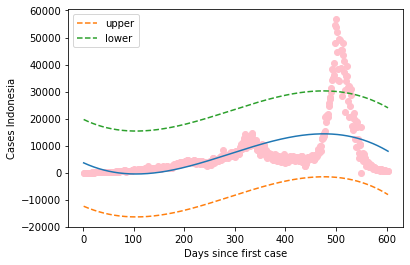

In [198]:
_,upper,lower=wls_prediction_std(poly3i)
plt.scatter(cases_i.Number_days_Day1,cases_i.new_cases,color='pink')
plt.plot(cases_i.Number_days_Day1,poly3i.predict(cases_i.Number_days_Day1))
plt.plot(cases_i.Number_days_Day1,upper,'--',label='upper')
plt.plot(cases_i.Number_days_Day1,lower,'--',label='lower')
plt.xlabel('Days since first case')
plt.ylabel('Cases Indonesia')
plt.legend()

Deaths Indonesia

In [199]:
deaths_i=IDN_data[['new_deaths','Number_days_Day1']]
lm_d_i = smf.ols(formula='new_deaths~Number_days_Day1', data=deaths_i).fit()
pred_deaths_i=lm_d_i.predict(deaths_i.Number_days_Day1)
x_new_deaths_i=pd.DataFrame({'Number_days_Day1':[604,605,606,607,608,609,610]})
pred_next_deaths_i=lm_d_i.predict(x_new_deaths_i.Number_days_Day1)

In [200]:
pred_next_deaths_i

0    567.968276
1    569.062226
2    570.156176
3    571.250126
4    572.344076
5    573.438026
6    574.531976
dtype: float64

In [201]:
print('lm_d_i_rsquared',lm_d_i.rsquared)
print('lm_d_i.pvalues',lm_d_i.pvalues)

lm_d_i_rsquared 0.2667437613043444
lm_d_i.pvalues Intercept           3.476826e-04
Number_days_Day1    2.026166e-42
dtype: float64


In [202]:
m.rmse(deaths_i.new_deaths,pred_deaths_i)

315.72163129489877

In [203]:
lm_d_i.conf_int()

,0,1
Intercept,-143.425419,-42.129707
Number_days_Day1,0.948650,1.239250


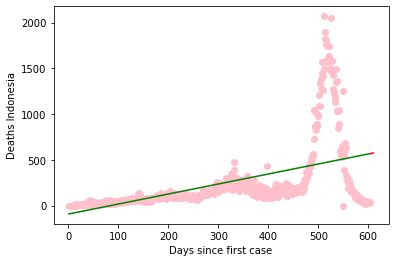

In [204]:
plt.scatter(deaths_i.Number_days_Day1,deaths_i.new_deaths,color='pink')
plt.plot(deaths_i.Number_days_Day1,pred_deaths_i,color='green')
plt.plot(x_new_deaths_i.Number_days_Day1,pred_next_deaths_i,color='red')
plt.xlabel('Days since first case')
plt.ylabel('Deaths Indonesia')
plt.show()

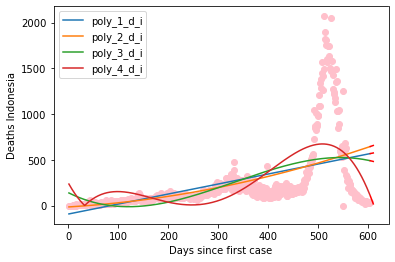

In [205]:
plt.scatter(deaths_i.Number_days_Day1,deaths_i.new_deaths,color='pink')
poly1_d_i=smf.ols(formula='new_deaths ~ 1+Number_days_Day1',data=deaths_i).fit()

plt.plot(deaths_i.Number_days_Day1,poly1_d_i.predict(deaths_i.Number_days_Day1),label='poly_1_d_i')
plt.plot(x_new_deaths_i.Number_days_Day1,poly1_d_i.predict(x_new_deaths_i.Number_days_Day1),color='red')

poly2_d_i=smf.ols(formula='new_deaths ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)',data=deaths_i).fit()

plt.plot(deaths_i.Number_days_Day1,poly2_d_i.predict(deaths_i.Number_days_Day1),label='poly_2_d_i')
plt.plot(x_new_deaths_i.Number_days_Day1,poly2_d_i.predict(x_new_deaths_i.Number_days_Day1),color='red')

poly3_d_i=smf.ols(formula='new_deaths ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)',data=deaths_i).fit()

plt.plot(deaths_i.Number_days_Day1,poly3_d_i.predict(deaths_i.Number_days_Day1),label='poly_3_d_i')
plt.plot(x_new_deaths_i.Number_days_Day1,poly3_d_i.predict(x_new_deaths_i.Number_days_Day1),color='red')

poly4_d_i=smf.ols(formula='new_deaths ~ 1+Number_days_Day1+I(Number_days_Day1**2.0)+I(Number_days_Day1**3.0)+I(Number_days_Day1**4.0)',data=deaths_i).fit()

plt.plot(deaths_i.Number_days_Day1,poly4_d_i.predict(deaths_i.Number_days_Day1).abs(),label='poly_4_d_i')
plt.plot(x_new_deaths_i.Number_days_Day1,poly4_d_i.predict(x_new_deaths_i.Number_days_Day1).abs(),color='red')
plt.xlabel('Days since first case')
plt.ylabel('Deaths Indonesia')
plt.legend()



In [206]:
print('poly1_d_i_rsquared',poly1_d_i.rsquared)
print('poly2_d_i_rsquared',poly2_d_i.rsquared)
print('poly3_d_i_rsquared',poly3_d_i.rsquared)
print('poly4_d_i_rsquared',poly4_d_i.rsquared)
print('poly1_d_i_pvalues',poly1_d_i.pvalues)
print('poly2_d_i_pvalues',poly2_d_i.pvalues)
print('poly3_d_i_pvalues',poly3_d_i.pvalues)
print('poly4_d_i_pvalues',poly4_d_i.pvalues)


poly1_d_i_rsquared 0.2667437613043444
poly2_d_i_rsquared 0.2754485980545879
poly3_d_i_rsquared 0.3004054316271402
poly4_d_i_rsquared 0.41744084323066744
poly1_d_i_pvalues Intercept           3.476826e-04
Number_days_Day1    2.026166e-42
dtype: float64
poly2_d_i_pvalues Intercept                     0.688397
Number_days_Day1              0.267472
I(Number_days_Day1 ** 2.0)    0.007457
dtype: float64
poly3_d_i_pvalues Intercept                     5.888101e-03
Number_days_Day1              1.672130e-04
I(Number_days_Day1 ** 2.0)    7.087498e-07
I(Number_days_Day1 ** 3.0)    4.644622e-06
dtype: float64
poly4_d_i_pvalues Intercept                     2.971377e-05
Number_days_Day1              3.687437e-13
I(Number_days_Day1 ** 2.0)    4.782477e-18
I(Number_days_Day1 ** 3.0)    8.507957e-23
I(Number_days_Day1 ** 4.0)    1.335761e-25
dtype: float64


In [207]:
print('poly1_d_i_rmse',m.rmse(deaths_i.new_deaths,poly1_d_i.predict(deaths_i.Number_days_Day1)))
print('poly2_d_i_rmse',m.rmse(deaths_i.new_deaths,poly2_d_i.predict(deaths_i.Number_days_Day1)))
print('poly3_d_i_rmse',m.rmse(deaths_i.new_deaths,poly3_d_i.predict(deaths_i.Number_days_Day1)))
print('poly4_d_i_rmse',m.rmse(deaths_i.new_deaths,poly4_d_i.predict(deaths_i.Number_days_Day1)))

poly1_d_i_rmse 315.72163129489877
poly2_d_i_rmse 313.8419946113257
poly3_d_i_rmse 308.38956132904775
poly4_d_i_rmse 281.4145002077607


In [208]:
poly1_d_i.conf_int()

,0,1
Intercept,-143.425419,-42.129707
Number_days_Day1,0.948650,1.239250


In [209]:
poly2_d_i.conf_int()

,0,1
Intercept,-91.213209,60.266254
Number_days_Day1,-0.251826,0.906422
I(Number_days_Day1 ** 2.0),0.000341,0.002198


In [210]:
poly3_d_i.conf_int()

,0,1
Intercept,40.569264,239.778372
Number_days_Day1,-4.179246,-1.325318
I(Number_days_Day1 ** 2.0),0.008518,0.019493
I(Number_days_Day1 ** 3.0),-0.000020,-0.000008


In [211]:
poly4_d_i.conf_int()

,0,1
Intercept,-3.586963e+02,-1.304207e+02
Number_days_Day1,7.279094e+00,1.250676e+01
I(Number_days_Day1 ** 2.0),-9.760131e-02,-6.244594e-02
I(Number_days_Day1 ** 3.0),1.842644e-04,2.716816e-04
I(Number_days_Day1 ** 4.0),-2.362561e-07,-1.644565e-07


Poly4_d_i is best for indonesia<br/>
Confidence interval for indonesia deaths

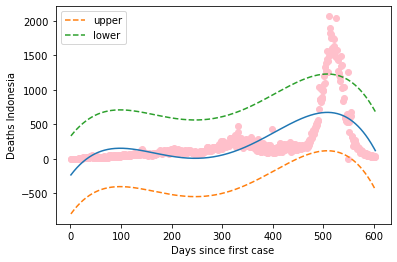

In [212]:
_,upper,lower=wls_prediction_std(poly4_d_i)
plt.scatter(deaths_i.Number_days_Day1,deaths_i.new_deaths,color='pink')
plt.plot(deaths_i.Number_days_Day1,poly4_d_i.predict(deaths_i.Number_days_Day1))
plt.plot(deaths_i.Number_days_Day1,upper,'--',label='upper')
plt.plot(deaths_i.Number_days_Day1,lower,'--',label='lower')
plt.xlabel('Days since first case')
plt.ylabel('Deaths Indonesia')
plt.legend()
